# **0. Описание задачи**

## Основная информация о датасете
Аневризмы — это аномальные выпячивания или вздутия стенки артерии. Они могут возникать в разных частях тела, но чаще всего встречаются в головном мозге (церебральные аневризмы) и сердечной аорте (аневризмы аорты). Аневризмы представляют серьезную опасность для здоровья, поскольку они могут разорваться, что приводит к сильному внутреннему кровотечению и потенциально фатальным последствиям.

Предоставленный набор данных содержит информацию о **99** пациентах с описанием различных гистоморфологических и гемодинамических характеристик аневризм.

Для каждого пацента известны **62** атрибута. Данные содержат следующую информацию о пациентах:
*   **case_id**: номер обращения за медицинской помощью;
*   **patient_id**: идентификатор пациента;
*   **aneurysmLocation**: расположение аневризмы в головном мозге;
*   **aneurysmType**: тип аневризмы;
*   **age**: возраст пациента;
*   **sex**: пол пациента;
*   **multipleAneurysms**: указывает, есть ли у пациента множественные аневризмы;
*   **ruptureStatus**: указывает, разорвалась ли аневризма или нет;
*   гемодинамические характеристики аневризмы, содержащиеся в 31 столбце таблицы: **sacVolume (объем аневризмы), sacSurfaceArea (площадь поверхности), vdcVolume (оцениваемый объем аневризмы с использованием диаграммы Вороного), vdcSurfaceArea (оцениваемая площадь поверхности аневризмы с использованием диаграммы Вороного), sacSectionArea (поперечная площадь сечения аневризмы), ellipsoidVolume (объем эллипсоида), ellipsoidMaxSemiaxis (максимальная полуось эллипсоида), ellipsoidMidSemiaxis, ellipsoidMinSemiaxis, sacCenterlineLength, ostiumSectionArea, ostiumSectionPerimeter, ostiumMinSize, ostiumMaxSize, ostiumShapeFactor, aspectRatio_star, sizeRatio_star, vesselDiameter, neckVesselAngle, sacVesselAngle, sacMinPressure, sacMaxPressure, sacMeanPressure, sacMaxSpeed, sacMeanSpeed, sacMinTAWSS, sacMaxTAWSS, sacMeanTAWSS, sacMinOSI, sacMaxOSI, sacMeanOSI**;
*   гистоморфологические характеристики аневризмы, содержащиеся в 23 столбцах таблицы: **vesselName (название сосуда), length (длина аневризмы), meanRadius (средний радиус), meanCurvature (среднее значение кривизны), meanTorsion (среднее кручение), tortuosity (извилистость), minRadius, maxRadius, maxCurvature, maxTorsion, bifurcationAngleInPlane, bifurcationAngleOutOfPlane, minPressure, maxPressure, meanPressure, maxSpeed, meanSpeed, minTAWSS, maxTAWSS, meanTAWSS, minOSI, maxOSI, meanOSI**.

Целевой переменной является **ruptureStatus**.


# **1. Чтение данных и их первичная обработка**

## Импорт необходимых библиотек и отключение вывода предупреждений

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

## Чтение данных

In [3]:
data = pd.read_csv('Merged_Aneurysm.csv')

In [4]:
data.head(10)

,case_id,patient_id,aneurysmLocation,aneurysmType,ruptureStatus,age,sex,multipleAneurysms,sacVolume,sacSurfaceArea,...,maxPressure,meanPressure,maxSpeed,meanSpeed,minTAWSS,maxTAWSS,meanTAWSS,minOSI,maxOSI,meanOSI
0,C0001,P0085,ICA,LAT,U,53,F,False,125.259604,120.453515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C0002,P0112,ICA,LAT,U,35,F,False,119.002032,122.427263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C0003,P0115,ICA,TER,U,43,F,False,12.740609,23.480617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C0004,P0116,ICA,TER,U,60,F,True,9.376307,18.084625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C0005,P0118,ICA,LAT,R,26,F,False,37.934454,54.844592,...,7665.0,3722.28,70.275319,13.19376,0.31251,176.44,20.90888,0.0,0.44672,0.001574
5,C0006,P0121,ICA,LAT,U,45,F,False,166.768050,130.673128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,C0007,P0126,ICA,LAT,U,44,F,True,189.890341,171.511293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,C0008,P0152,ACA,TER,R,68,M,False,31.027451,42.461832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,C0009,P0172,ACA,TER,R,39,F,False,92.021799,127.844372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,C0010,P0173,ACA,TER,U,63,F,False,62.688596,78.796828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для удобства восприятия переместим столбец "ruptureStatus" в конец датасета.

In [5]:
rs = data['ruptureStatus']
data = data.drop('ruptureStatus', axis=1)
data['ruptureStatus'] = rs
data.head(10)

,case_id,patient_id,aneurysmLocation,aneurysmType,age,sex,multipleAneurysms,sacVolume,sacSurfaceArea,vdcVolume,...,meanPressure,maxSpeed,meanSpeed,minTAWSS,maxTAWSS,meanTAWSS,minOSI,maxOSI,meanOSI,ruptureStatus
0,C0001,P0085,ICA,LAT,53,F,False,125.259604,120.453515,111.237957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
1,C0002,P0112,ICA,LAT,35,F,False,119.002032,122.427263,113.720361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
2,C0003,P0115,ICA,TER,43,F,False,12.740609,23.480617,11.865511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
3,C0004,P0116,ICA,TER,60,F,True,9.376307,18.084625,9.031234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
4,C0005,P0118,ICA,LAT,26,F,False,37.934454,54.844592,35.903048,...,3722.28,70.275319,13.19376,0.31251,176.44,20.90888,0.0,0.44672,0.001574,R
5,C0006,P0121,ICA,LAT,45,F,False,166.768050,130.673128,157.934121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
6,C0007,P0126,ICA,LAT,44,F,True,189.890341,171.511293,165.537895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
7,C0008,P0152,ACA,TER,68,M,False,31.027451,42.461832,29.323896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R
8,C0009,P0172,ACA,TER,39,F,False,92.021799,127.844372,55.657246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R
9,C0010,P0173,ACA,TER,63,F,False,62.688596,78.796828,58.662977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U


## Удаление нерелевантных признаков

Выполним удаление столбцов, которые не оказывают влияния на результаты классификации (уникальный номер пациента и идентификатор случая обращения за медицинской помощью).

In [6]:
duplicate = data.duplicated(subset=['case_id'])
num_duplicates = duplicate.sum()
print("Количество повторений в столбце case_id: ", num_duplicates)

duplicate = data.duplicated(subset=['patient_id'])
num_duplicates = duplicate.sum()
print("Количество повторений в столбце patient_id: ", num_duplicates)

Количество повторений в столбце case_id:  0
Количество повторений в столбце patient_id:  0


In [7]:
data.drop(['case_id', 'patient_id'], axis=1, inplace=True)
data.shape

(99, 60)

## Вывод основной информации о структуре датасета

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   aneurysmLocation            99 non-null     object 
 1   aneurysmType                99 non-null     object 
 2   age                         99 non-null     int64  
 3   sex                         99 non-null     object 
 4   multipleAneurysms           99 non-null     bool   
 5   sacVolume                   99 non-null     float64
 6   sacSurfaceArea              99 non-null     float64
 7   vdcVolume                   99 non-null     float64
 8   vdcSurfaceArea              99 non-null     float64
 9   sacSectionArea              99 non-null     float64
 10  ellipsoidVolume             97 non-null     float64
 11  ellipsoidMaxSemiaxis        97 non-null     float64
 12  ellipsoidMidSemiaxis        97 non-null     float64
 13  ellipsoidMinSemiaxis        97 non-nu

# **2. Визуализация данных и вычисление основных характеристик**

## Основные статистические характеристики числовых признаков

In [9]:
data.describe()

,age,sacVolume,sacSurfaceArea,vdcVolume,vdcSurfaceArea,sacSectionArea,ellipsoidVolume,ellipsoidMaxSemiaxis,ellipsoidMidSemiaxis,ellipsoidMinSemiaxis,...,maxPressure,meanPressure,maxSpeed,meanSpeed,minTAWSS,maxTAWSS,meanTAWSS,minOSI,maxOSI,meanOSI
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,97.000000,97.000000,97.000000,97.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0,8.000000,8.000000
mean,54.363636,213.465690,148.042882,193.167923,132.116803,32.298026,141.801212,3.609616,2.616163,2.242248,...,2424.087500,1037.260277,32.487594,7.452501,0.275435,55.867875,11.385739,0.0,0.326351,0.002464
std,13.575529,283.449550,135.331587,259.012493,120.939606,29.318994,196.592769,1.482829,1.186162,1.073294,...,2662.996587,1325.432582,19.659618,4.306072,0.138160,54.615555,6.329626,0.0,0.125877,0.003573
min,24.000000,2.339496,7.333407,2.121879,6.495522,1.541592,6.185859,1.489500,1.093500,0.788130,...,654.520000,241.729559,15.451824,3.402625,0.007770,16.127000,4.918505,0.0,0.129690,0.000450
25%,43.000000,38.104803,51.113444,35.284619,49.519521,10.677713,24.233485,2.461100,1.626100,1.406300,...,684.672500,286.737625,18.142043,4.103566,0.206823,21.147500,5.862933,0.0,0.236327,0.000940
50%,54.000000,94.271201,99.918995,86.775358,88.303375,20.560135,62.414554,3.282200,2.298000,1.876100,...,1094.365000,395.811790,24.567501,5.387447,0.286500,30.994000,9.686404,0.0,0.320440,0.001452
75%,64.000000,282.404041,208.881631,257.137742,182.535729,46.181408,182.881853,4.504700,3.266400,2.858300,...,2929.850000,982.220385,41.159069,11.854235,0.381758,71.851000,16.943698,0.0,0.449885,0.001702
max,85.000000,1312.025948,625.717664,1223.412403,583.439703,131.281126,944.044860,8.823800,6.038600,5.421500,...,7665.000000,3722.280000,70.275319,13.193760,0.430850,176.440000,20.908880,0.0,0.472070,0.011223




*   count — количество значений для каждого признака
*   mean — среднее значение
*   std — стандартное отклонение, значение которого показывает, на сколько в среднем отклоняются варианты от среднего значения
*   min — минимальное значение
*   25% — значения, которые объект не превышает с вероятностью 25%
*   50% — медиана, то есть значения, которые объект не превышает с вероятностью 25%
*   75% — значения, которые объект не превышает с вероятностью 75%
*   max — максимальное значение



## Описательная статистика для категориальных признаков

In [10]:
data.describe(include=['object'])

,aneurysmLocation,aneurysmType,sex,vesselName,ruptureStatus
count,99,99,99,99,99
unique,4,2,2,4,2
top,ICA,TER,F,ICA,U
freq,45,60,62,45,55


## Описательная статистика для логических признаков

In [11]:
data.describe(include=['bool'])

,multipleAneurysms
count,99
unique,2
top,False
freq,86


## **Визуализация данных**

### Анализ разрыва аневризмы в зависимости от пола пациента

Посмотрим, у кого наиболее часто разрывались аневризмы - у мужчин или у женщин?

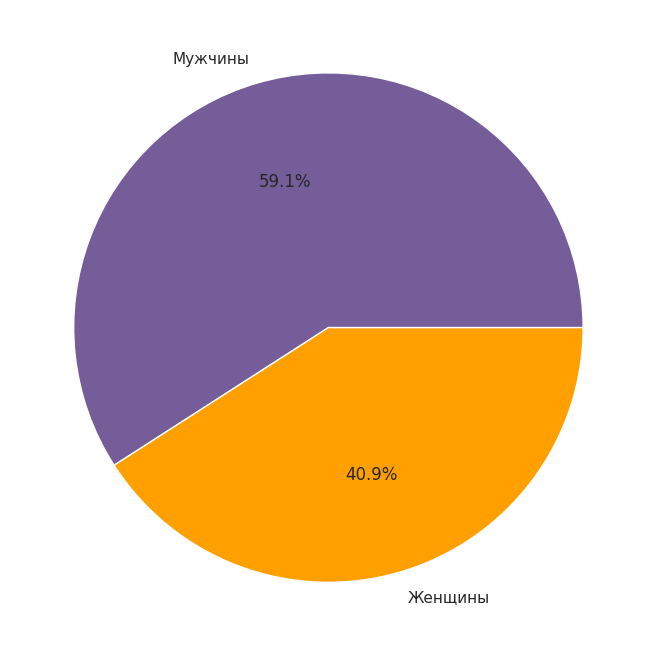

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
filtered_data = data[data['ruptureStatus'] == 'R']
gender_counts = filtered_data['sex'].value_counts()
plt.pie(gender_counts, autopct='%1.1f%%', pctdistance = 0.6, labels = ['Мужчины', 'Женщины'], colors = [(117/255,93/255,154/255), (255/255,160/255,0/255)])
pass

Разрывы аневризм чаще наблюдались у мужчин.

### Анализ разрыва аневризмы в зависимости от её местоположения в головном мозге

Построим диаграмму, иллюстрирующую зависимость разрыва аневризмы от её местоположения в головном мозге пациента.

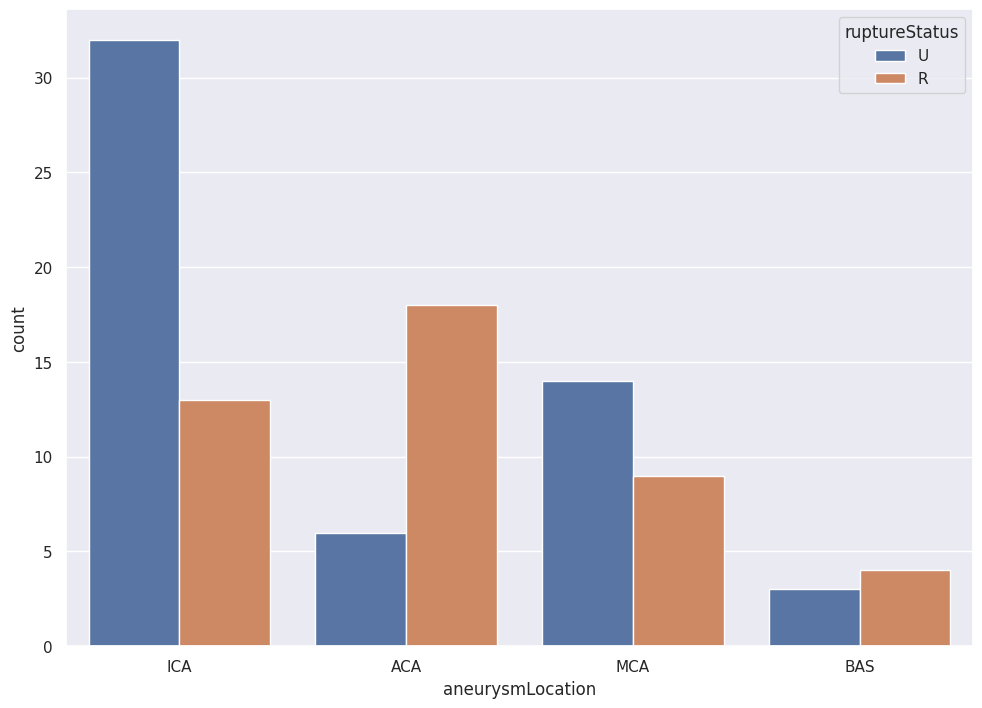

In [13]:
sns.countplot(data=data, x='aneurysmLocation', hue='ruptureStatus')
pass

Наибольшее количество разрывов было зафиксировано в передней мозговой артерии (ACA), а наименьшее во внутренней сонной артерии (ICA).

### Зависимость разрыва аневризмы от возраста пациента

Построим гистограмму, иллюстрирующую зависимость разрыва аневризмы от возраста пациента.

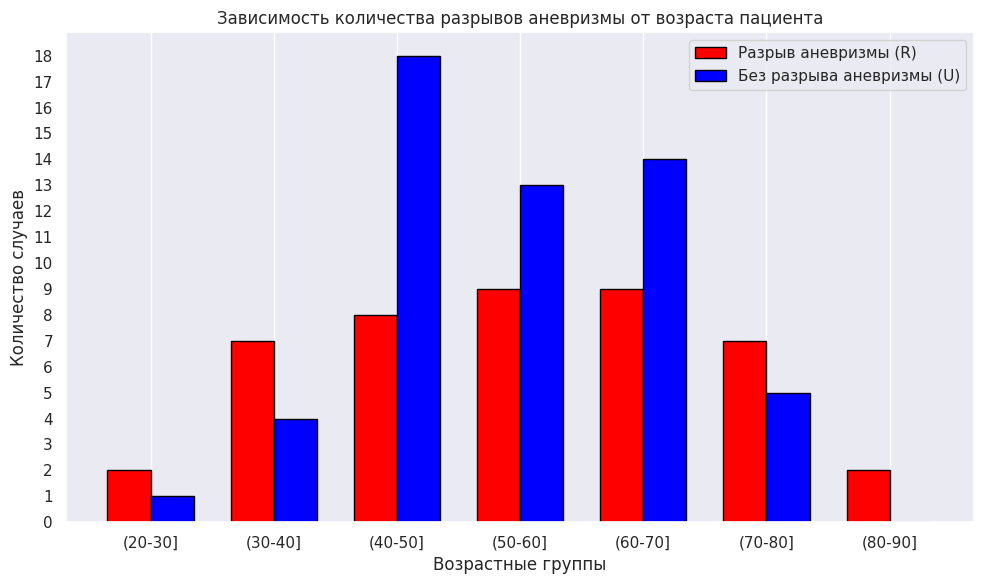

In [14]:
datarez = data.copy(deep = True)
plt.figure(figsize = (10, 6))

bins = range(20, 100, 10)
labelsrez = [f'({i}-{i+10}]' for i in bins[:-1]]

datarez['age_group'] = pd.cut(datarez['age'], bins=bins, labels=labelsrez, right=False)

rupture_counts = datarez[datarez['ruptureStatus'] == 'R'].groupby('age_group').count()['ruptureStatus']
no_rupture_counts = datarez[datarez['ruptureStatus'] == 'U'].groupby('age_group').count()['ruptureStatus']

x = range(len(labelsrez))
width = 0.35

plt.bar(x, rupture_counts, width, label='Разрыв аневризмы (R)', color='red', edgecolor='black')
plt.bar([p + width for p in x], no_rupture_counts, width, label='Без разрыва аневризмы (U)', color='blue', edgecolor='black')

plt.title('Зависимость количества разрывов аневризмы от возраста пациента')
plt.xlabel('Возрастные группы')
plt.ylabel('Количество случаев')
plt.xticks([p + width / 2 for p in x], labelsrez)
plt.legend()
plt.grid(axis='y')
plt.yticks(range(0, int(max(rupture_counts.max(), no_rupture_counts.max())) + 1))

plt.tight_layout()
plt.show()

Наибольшее число разрывов аневризм фиксируется у пацентов в возрасте от 50 до 70 лет.

### Зависимость разрыва аневризмы от её типа

Построим диаграмму, иллюстрирующую зависимость разрыва аневризмы от её типа.

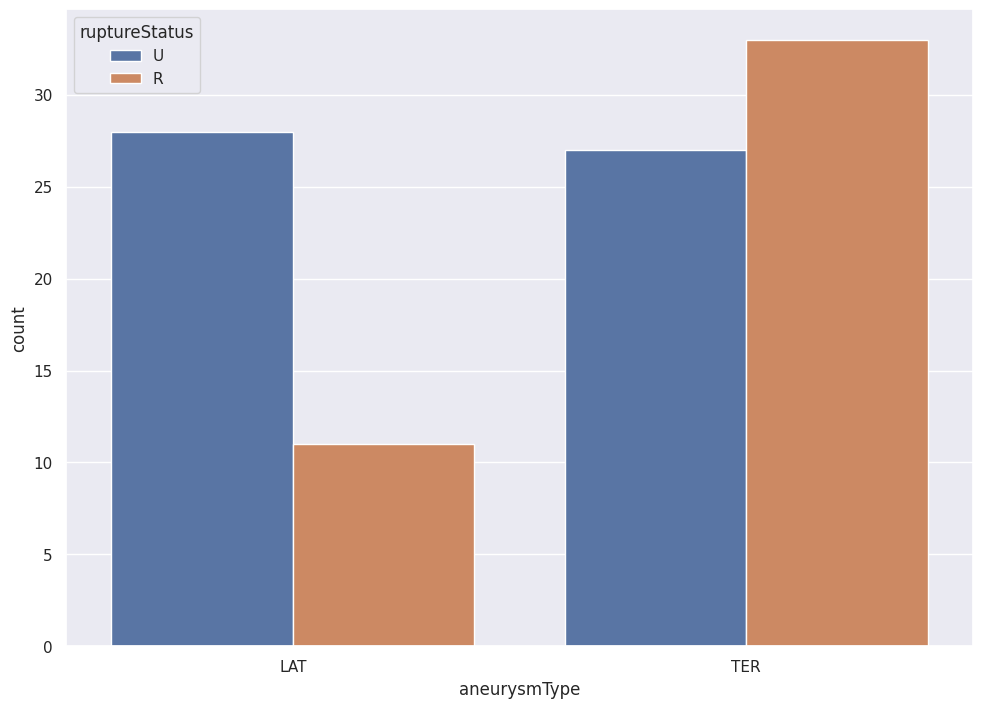

In [15]:
sns.countplot(data=data, x='aneurysmType', hue='ruptureStatus')
pass

Наиболее часто разрывается мешотчатая аневризма (TER).

### Анализ объема аневризм пациентов

Построим диаграмму, иллюстрирующую рассеяние объема аневризм пациентов.

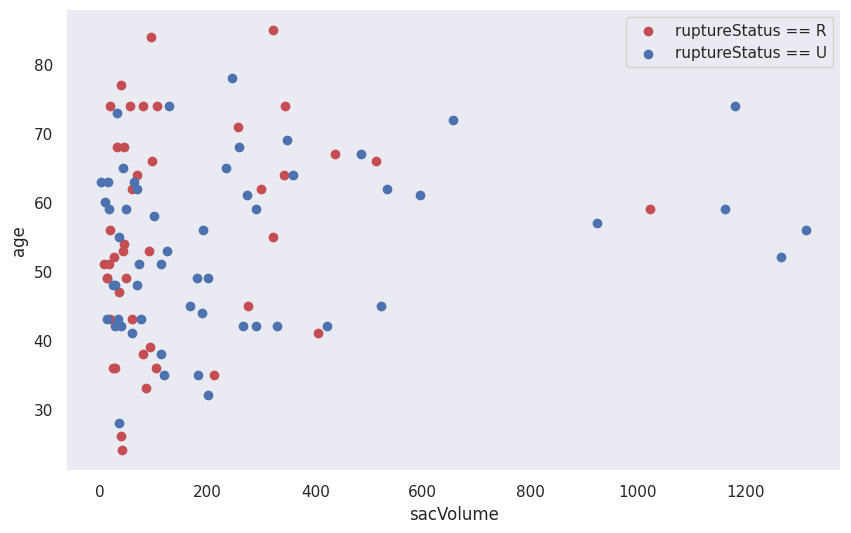

In [16]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['ruptureStatus'] == 'R']['sacVolume'],
            data[data['ruptureStatus'] == 'R']['age'],
            label = 'ruptureStatus == R',
            color = 'r')

plt.scatter(data[data['ruptureStatus'] == 'U']['sacVolume'],
            data[data['ruptureStatus'] == 'U']['age'],
            label = 'ruptureStatus == U',
            color = 'b')

plt.xlabel('sacVolume')
plt.ylabel('age')
plt.legend()
plt.grid()

Видим, что наиболее распространены аневризмы объемом от 0 до 170 $мм^3$.

### Некоторые дополнительные гистограммы

Построим гистограммы некоторых признаков (ввиду их большого числа ограничимся шестью примерами).

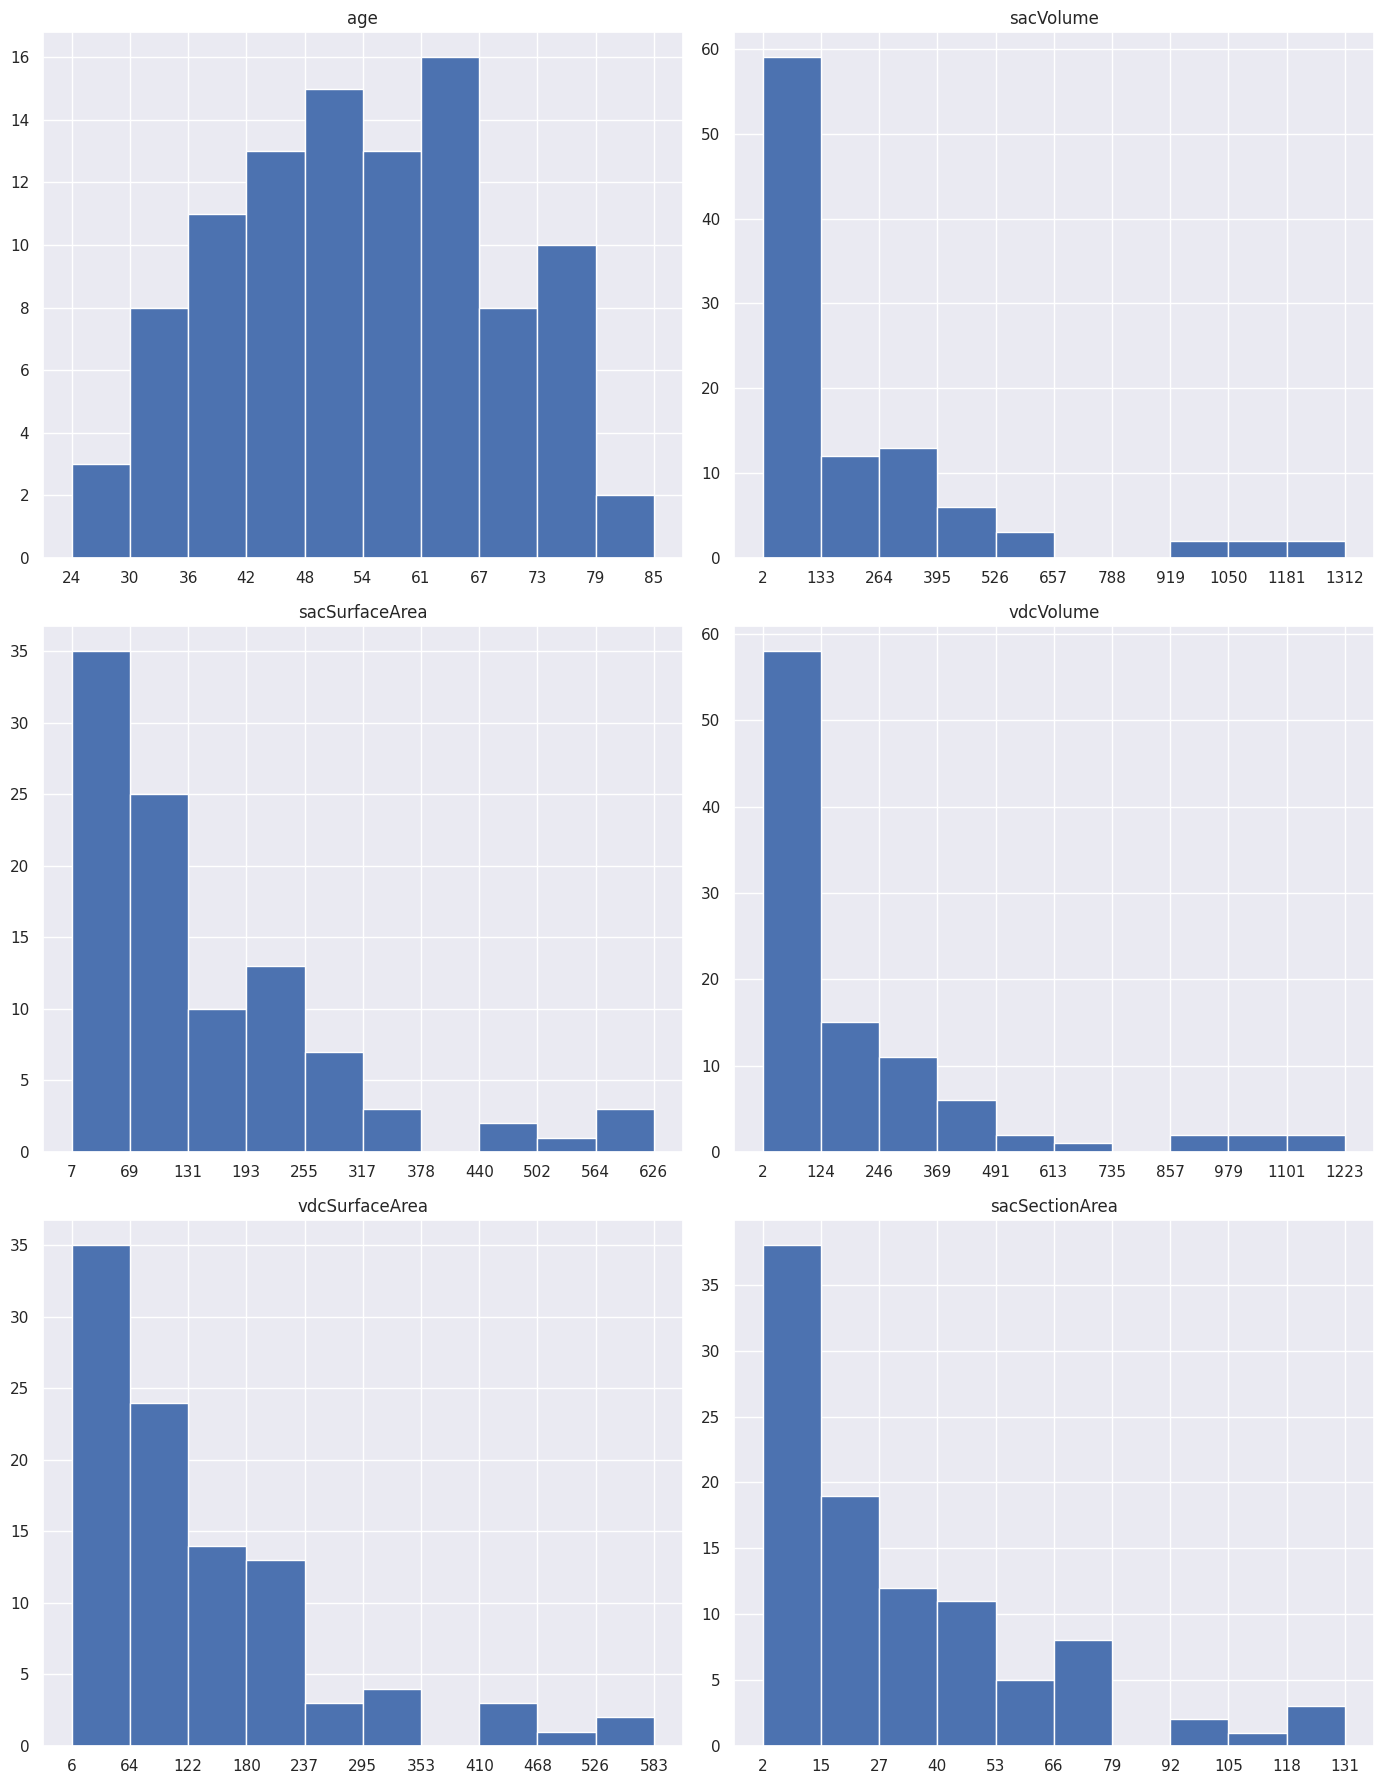

In [17]:
from matplotlib.ticker import FormatStrFormatter
numeric_columns = data.select_dtypes(include=['float', 'int']).columns.tolist()
numeric_columns = numeric_columns[:6]
data_hist = data[numeric_columns]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.ravel()
for i in range(len(data_hist.columns)):
    counts, bins, patches = axes[i].hist(data_hist.iloc[:, i])
    axes[i].set_xticks(bins)
    axes[i].xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    plt.subplots_adjust(bottom=0.15)
    axes[i].set_title(data_hist.columns[i])
plt.tight_layout()
plt.show()

# **3. Обработка логических и категориальных признаков**

Посмотрим, какие типы признаков имеются в датасете.

In [18]:
print(data.dtypes)

aneurysmLocation               object
aneurysmType                   object
age                             int64
sex                            object
multipleAneurysms                bool
sacVolume                     float64
sacSurfaceArea                float64
vdcVolume                     float64
vdcSurfaceArea                float64
sacSectionArea                float64
ellipsoidVolume               float64
ellipsoidMaxSemiaxis          float64
ellipsoidMidSemiaxis          float64
ellipsoidMinSemiaxis          float64
sacCenterlineLength           float64
ostiumSectionArea             float64
ostiumSectionPerimeter        float64
ostiumMinSize                 float64
ostiumMaxSize                 float64
ostiumShapeFactor             float64
aspectRatio_star              float64
sizeRatio_star                float64
vesselDiameter                float64
neckVesselAngle               float64
sacVesselAngle                float64
sacMinPressure                float64
sacMaxPressu

Таким образом, в датасете имеется три типа признаков:

1.   логический - столбец multipleAneurysms;
2.   категориальные - столбцы aneurysmLocation, aneurysmType, sex, vesselName, ruptureStatus;
3.   числовые - столбцы age, sacVolume, sacSurfaceArea, vdcVolume и прочие, не вошедшие в первые два пункта.

## Преобразование категориальных и логических признаков

Перечислим признаки, которые являются категориальными:


1.   Признак "aneurysmLocation" принимает значения - 'ICA',  'ACA',  'MCA',  'BAS';
2.   Признак "aneurysmType" принимает значения - 'LAT', 'TER';
3.   Признак "sex" принимает значения - 'M', 'F';
4.   Признак "vesselName" принимает значения - 'ICA',  'ACA',  'MCA',  'BAS';
5.   Признак "ruptureStatus" принимает значения - 'U', 'R'.

Выполним преобразование категориальных и логических признаков к типу "int" для возможности построения корреляционной диаграммы и обеспечения возможности их обработки алгоритмами машинного обучения.


In [19]:
data['multipleAneurysms'] = data['multipleAneurysms'].astype(int)

In [20]:
print(data['aneurysmLocation'].unique())
data.loc[(data.aneurysmLocation == 'ICA'), 'aneurysmLocation'] = 1
data.loc[(data.aneurysmLocation == 'ACA'), 'aneurysmLocation'] = 2
data.loc[(data.aneurysmLocation == 'MCA'), 'aneurysmLocation'] = 3
data.loc[(data.aneurysmLocation == 'BAS'), 'aneurysmLocation'] = 4
data['aneurysmLocation'] = data['aneurysmLocation'].astype('int')

['ICA' 'ACA' 'MCA' 'BAS']


In [21]:
print(data['vesselName'].unique())
data.loc[(data.vesselName == 'ICA'), 'vesselName'] = 1
data.loc[(data.vesselName == 'ACA'), 'vesselName'] = 2
data.loc[(data.vesselName == 'MCA'), 'vesselName'] = 3
data.loc[(data.vesselName == 'BAS'), 'vesselName'] = 4
data['vesselName'] = data['vesselName'].astype('int')

['ICA' 'ACA' 'MCA' 'BAS']


Значения в столбцах "aneurysmLocation" и "vesselName" кажутся подозрительными. Их мы дополнительно исследуем после визуализации корреляционной матрицы.

In [22]:
print(data['aneurysmType'].unique())
data.loc[(data.aneurysmType == 'LAT'), 'aneurysmType'] = 0
data.loc[(data.aneurysmType == 'TER'), 'aneurysmType'] = 1
data['aneurysmType'] = data['aneurysmType'].astype('int')

['LAT' 'TER']


In [23]:
print(data['sex'].unique())
data.loc[(data.sex == 'M'), 'sex'] = 0
data.loc[(data.sex == 'F'), 'sex'] = 1
data['sex'] = data['sex'].astype('int')

['F' 'M']


In [24]:
print(data['ruptureStatus'].unique())
data.loc[(data.ruptureStatus == 'U'), 'ruptureStatus'] = 0
data.loc[(data.ruptureStatus == 'R'), 'ruptureStatus'] = 1
data['ruptureStatus'] = data['ruptureStatus'].astype('int')

['U' 'R']


# **4. Обработка пропущенных значений**

## Определение количества пропущенных значений

Посмотрим, сколько пропущенных значений имеется в каждом столбце:

In [25]:
data.isnull().sum()

,0
aneurysmLocation,0
aneurysmType,0
age,0
sex,0
multipleAneurysms,0
sacVolume,0
sacSurfaceArea,0
vdcVolume,0
vdcSurfaceArea,0
sacSectionArea,0


Видим, что в 26 столбцах присутствуют пропущенные значения (NaN). Все они являются числовыми переменными.

## Вычисление разраброса по пропущенным значениям

Вычислим для каждого столбца разброс по пропущенным значениям (в процентах). Восстановление признаков с разбросом более 90% не представляется возможным, поэтому такие признаки будут удалены из датасета. Признаки с разбросом менее 2% будут восстановлены с использованием медианного значения.

In [26]:
print((data.isna().sum() / data.shape[0] * 100).sort_values(ascending=False))

sacMinTAWSS                   91.919192
sacMeanPressure               91.919192
sacMinPressure                91.919192
sacMaxSpeed                   91.919192
sacMeanSpeed                  91.919192
sacMaxTAWSS                   91.919192
sacMeanTAWSS                  91.919192
sacMinOSI                     91.919192
sacMaxOSI                     91.919192
sacMeanOSI                    91.919192
minPressure                   91.919192
maxPressure                   91.919192
meanPressure                  91.919192
sacMaxPressure                91.919192
maxSpeed                      91.919192
meanSpeed                     91.919192
minTAWSS                      91.919192
maxTAWSS                      91.919192
meanTAWSS                     91.919192
minOSI                        91.919192
maxOSI                        91.919192
meanOSI                       91.919192
ellipsoidMidSemiaxis           2.020202
ellipsoidMaxSemiaxis           2.020202
ellipsoidVolume                2.020202


## Удаление признаков, которые нельзя восстановить

Удалим признаки, восстановление которых не представляется возможным.

In [27]:
delCol = []
t = (data.isna().sum() / data.shape[0] * 100).sort_values(ascending=False)
for i in range(len(t)):
  if t.iloc[i] > 90:
    delCol.append(t.index[i])

print(delCol)

['sacMinTAWSS', 'sacMeanPressure', 'sacMinPressure', 'sacMaxSpeed', 'sacMeanSpeed', 'sacMaxTAWSS', 'sacMeanTAWSS', 'sacMinOSI', 'sacMaxOSI', 'sacMeanOSI', 'minPressure', 'maxPressure', 'meanPressure', 'sacMaxPressure', 'maxSpeed', 'meanSpeed', 'minTAWSS', 'maxTAWSS', 'meanTAWSS', 'minOSI', 'maxOSI', 'meanOSI']


In [28]:
data.drop(delCol, axis=1, inplace=True)
data.shape

(99, 38)

In [29]:
data

,aneurysmLocation,aneurysmType,age,sex,multipleAneurysms,sacVolume,sacSurfaceArea,vdcVolume,vdcSurfaceArea,sacSectionArea,...,meanCurvature,meanTorsion,tortuosity,minRadius,maxRadius,maxCurvature,maxTorsion,bifurcationAngleInPlane,bifurcationAngleOutOfPlane,ruptureStatus
0,1,0,53,1,0,125.259604,120.453515,111.237957,106.759273,21.938237,...,0.149981,0.218960,0.682769,0.938298,2.092899,0.513167,3.218984,76.670529,4.719235,0
1,1,0,35,1,0,119.002032,122.427263,113.720361,115.774279,18.493788,...,0.171728,0.226861,1.153133,1.388250,2.629028,0.532819,5.330711,116.839304,15.753911,0
2,1,1,43,1,0,12.740609,23.480617,11.865511,21.853480,6.142748,...,0.154458,0.265859,0.804790,1.288915,1.919531,0.299136,3.393943,123.657085,9.378066,0
3,1,1,60,1,1,9.376307,18.084625,9.031234,17.295395,4.905063,...,0.135058,0.240853,0.837999,1.069440,1.915735,0.296743,5.385147,129.829251,27.053597,0
4,1,0,26,1,0,37.934454,54.844592,35.903048,52.303479,9.729065,...,0.125326,0.249789,0.548677,0.694086,2.024693,0.355401,8.852139,117.065812,23.284114,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,4,1,43,1,0,76.340708,75.181897,73.667218,72.394490,23.546124,...,0.035592,0.580623,0.030128,1.182271,1.633734,0.100354,206.185748,142.638440,24.376264,0
95,4,1,67,0,0,436.828426,260.200509,406.697959,235.955139,70.007099,...,0.040250,2.902317,0.004633,1.102568,1.461093,0.122552,369.150248,170.869270,31.984847,1
96,1,0,84,1,0,94.271201,100.528873,90.072358,95.666266,19.046069,...,0.177326,0.423415,0.660796,1.353043,2.451011,0.530284,137.867462,124.049528,17.519173,1
97,3,1,59,1,0,1022.481082,466.087643,981.326431,446.253620,111.244307,...,0.017038,0.589782,0.001915,1.178609,1.467881,0.038822,67.053940,185.431347,15.662535,1


In [30]:
print(data.isnull().sum())

aneurysmLocation              0
aneurysmType                  0
age                           0
sex                           0
multipleAneurysms             0
sacVolume                     0
sacSurfaceArea                0
vdcVolume                     0
vdcSurfaceArea                0
sacSectionArea                0
ellipsoidVolume               2
ellipsoidMaxSemiaxis          2
ellipsoidMidSemiaxis          2
ellipsoidMinSemiaxis          2
sacCenterlineLength           0
ostiumSectionArea             0
ostiumSectionPerimeter        0
ostiumMinSize                 0
ostiumMaxSize                 0
ostiumShapeFactor             0
aspectRatio_star              0
sizeRatio_star                0
vesselDiameter                0
neckVesselAngle               0
sacVesselAngle                0
vesselName                    0
length                        0
meanRadius                    0
meanCurvature                 0
meanTorsion                   0
tortuosity                    0
minRadiu

## Восстановление медианой

Применим восстановление медианой к признакам 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis'.

In [31]:
import numpy as np
from sklearn.impute import SimpleImputer

In [32]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
for i in ['ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis']:
  data[i] = imputer.fit_transform(data[i].values.reshape(-1,1))

data.isna().sum()

,0
aneurysmLocation,0
aneurysmType,0
age,0
sex,0
multipleAneurysms,0
sacVolume,0
sacSurfaceArea,0
vdcVolume,0
vdcSurfaceArea,0
sacSectionArea,0


In [33]:
print(data.dtypes)

aneurysmLocation                int64
aneurysmType                    int64
age                             int64
sex                             int64
multipleAneurysms               int64
sacVolume                     float64
sacSurfaceArea                float64
vdcVolume                     float64
vdcSurfaceArea                float64
sacSectionArea                float64
ellipsoidVolume               float64
ellipsoidMaxSemiaxis          float64
ellipsoidMidSemiaxis          float64
ellipsoidMinSemiaxis          float64
sacCenterlineLength           float64
ostiumSectionArea             float64
ostiumSectionPerimeter        float64
ostiumMinSize                 float64
ostiumMaxSize                 float64
ostiumShapeFactor             float64
aspectRatio_star              float64
sizeRatio_star                float64
vesselDiameter                float64
neckVesselAngle               float64
sacVesselAngle                float64
vesselName                      int64
length      

# **5. Обработка коррелированных признаков**

## Построение корреляционной диаграммы

In [34]:
matr = data.corr(numeric_only = True)
matr

,aneurysmLocation,aneurysmType,age,sex,multipleAneurysms,sacVolume,sacSurfaceArea,vdcVolume,vdcSurfaceArea,sacSectionArea,...,meanCurvature,meanTorsion,tortuosity,minRadius,maxRadius,maxCurvature,maxTorsion,bifurcationAngleInPlane,bifurcationAngleOutOfPlane,ruptureStatus
aneurysmLocation,1.000000,0.649793,-0.051886,-0.361446,-0.150831,-0.193493,-0.210111,-0.190163,-0.207378,-0.178019,...,-0.847861,0.276123,-0.772757,-0.309092,-0.584632,-0.794963,0.069608,0.298491,0.310866,0.156498
aneurysmType,0.649793,1.000000,-0.082370,-0.366440,-0.114996,-0.344277,-0.365285,-0.341869,-0.370238,-0.349866,...,-0.755589,0.294244,-0.765913,-0.458512,-0.777066,-0.784425,0.128921,0.484020,0.365259,0.263483
age,-0.051886,-0.082370,1.000000,-0.065766,0.086960,0.191405,0.211671,0.176447,0.185347,0.181597,...,0.078912,-0.027684,0.051590,0.169806,0.197983,0.098090,0.028639,-0.097627,0.131489,0.052675
sex,-0.361446,-0.366440,-0.065766,1.000000,0.053076,0.008352,-0.010494,0.018469,-0.002268,-0.015353,...,0.427076,-0.011070,0.383195,0.102795,0.295141,0.400462,0.084994,-0.265979,-0.157213,-0.065361
multipleAneurysms,-0.150831,-0.114996,0.086960,0.053076,1.000000,0.002659,0.000550,0.011884,0.016596,0.023834,...,0.128861,0.045097,0.195882,0.059263,0.034763,0.116914,0.172582,0.006448,0.092372,-0.167188
sacVolume,-0.193493,-0.344277,0.191405,0.008352,0.002659,1.000000,0.980911,0.995017,0.982228,0.959597,...,0.130307,-0.126332,0.201763,0.219044,0.380971,0.209730,-0.054868,0.030418,-0.123201,-0.218080
sacSurfaceArea,-0.210111,-0.365285,0.211671,-0.010494,0.000550,0.980911,1.000000,0.966821,0.985217,0.961882,...,0.137903,-0.145251,0.212448,0.216419,0.380662,0.215825,-0.067248,0.039758,-0.108655,-0.208140
vdcVolume,-0.190163,-0.341869,0.176447,0.018469,0.011884,0.995017,0.966821,1.000000,0.984744,0.956499,...,0.133359,-0.119745,0.206858,0.223534,0.378209,0.210939,-0.051091,0.034587,-0.127970,-0.223816
vdcSurfaceArea,-0.207378,-0.370238,0.185347,-0.002268,0.016596,0.982228,0.985217,0.984744,1.000000,0.963805,...,0.146822,-0.135895,0.227781,0.230328,0.385455,0.220919,-0.059837,0.044265,-0.120654,-0.227264
sacSectionArea,-0.178019,-0.349866,0.181597,-0.015353,0.023834,0.959597,0.961882,0.956499,0.963805,1.000000,...,0.124055,-0.129925,0.205461,0.221435,0.371408,0.205698,-0.072184,0.053128,-0.100522,-0.206130


## Визуализация корреляционной диаграммы

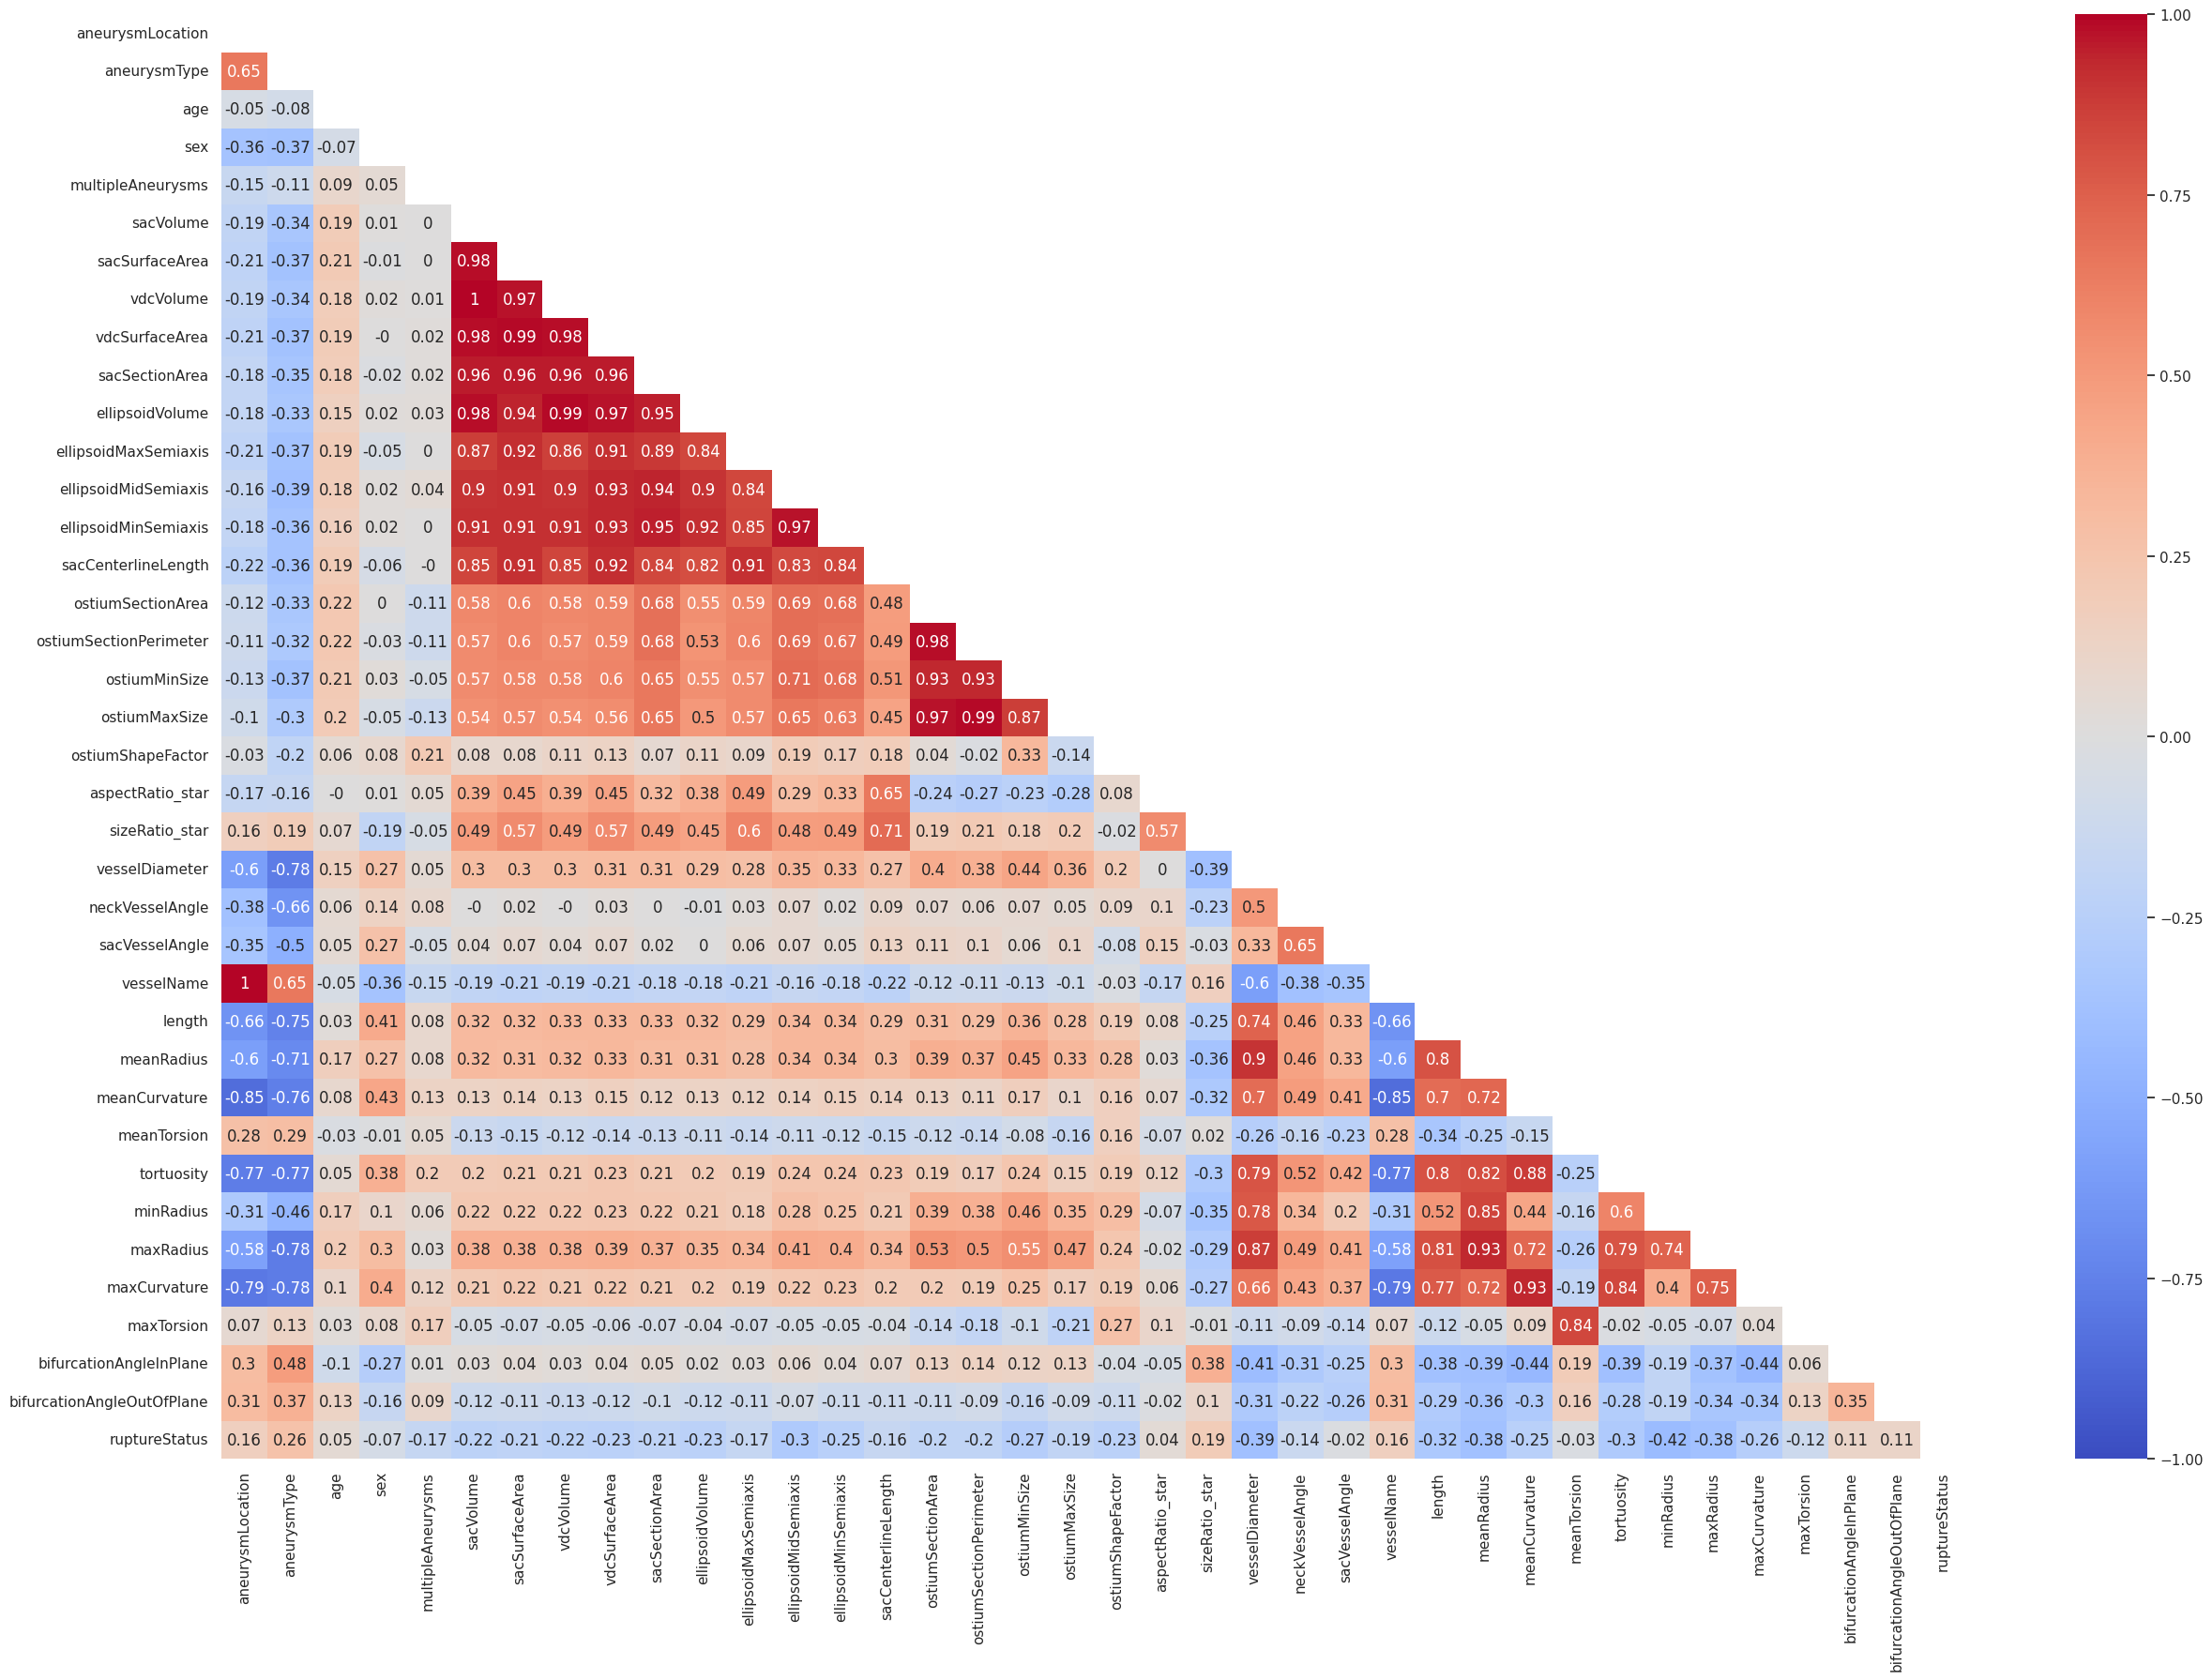

In [35]:
corr_matrix = round(data.corr(numeric_only = True), 2)
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30,20))
    sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True, mask=mask)

На корреляционной диаграмме можно выделить группы признаков с высокой корреляцией (> 0.93):
1.   гистоморфологическая группа sacSurfaceArea - sacCenterlineLength;
2.   гистоморфологическая группа ostiumSectionPerimeter - ostiumMaxSize.

Все эти признаки относятся к гистоморфологическим характеристикам аневризм головного мозга и используются для описания геометричской формы аневризмы (пример: чем больше объем аневризмы, тем больше её площадь поверхности).

Следует отметить, что случаи разрыва аневризмы не особо сильно коррелируют с прочими признаками. Это может указывать на неэффективность использования линейных моделей на данном датасете, возможно, более целесообразно использовать деревья решений или нейронные сети.

## Удаление коррелированных признаков

Исследуем причины высокой корреляции признаков "aneurysmLocation" и "vesselName" подробнее. Явно проверим полное совпадение столбцов aneurysmLocation и vesselName.

In [36]:
flag = True
n = 0
for i in range(len(data)):
  if data['vesselName'][i] != data['aneurysmLocation'][i]:
    flag = False
    break
  n += 1

print("Результаты проверки столбцов. Флаг полного совпадения -", flag, ", количество проверенных строк -", n)

Результаты проверки столбцов. Флаг полного совпадения - True , количество проверенных строк - 99


Удалим столбец "vesselName", который по неизвестной причине полностью дублирует столбец "aneurysmLocation", с целью повышения точности и сокращения времени обучения выбранных моделей. Здесь же произведем удаление и коррелированных признаков, для которых значение коэффициента корреляции строго больше 0.93.

In [37]:
data.drop(['vesselName'], axis=1, inplace=True)
data.drop(['vdcVolume'], axis=1, inplace=True)
data.drop(['ostiumMaxSize'], axis=1, inplace=True)
data.drop(['ostiumSectionPerimeter'], axis=1, inplace=True)
data.drop(['sacSurfaceArea'], axis=1, inplace=True)
data.drop(['vdcSurfaceArea'], axis=1, inplace=True)
data.drop(['ellipsoidVolume'], axis=1, inplace=True)
data.drop(['ellipsoidMinSemiaxis'], axis=1, inplace=True)
data.drop(['sacSectionArea'], axis=1, inplace=True)
data.drop(['meanRadius'], axis=1, inplace=True)
data.shape

(99, 28)

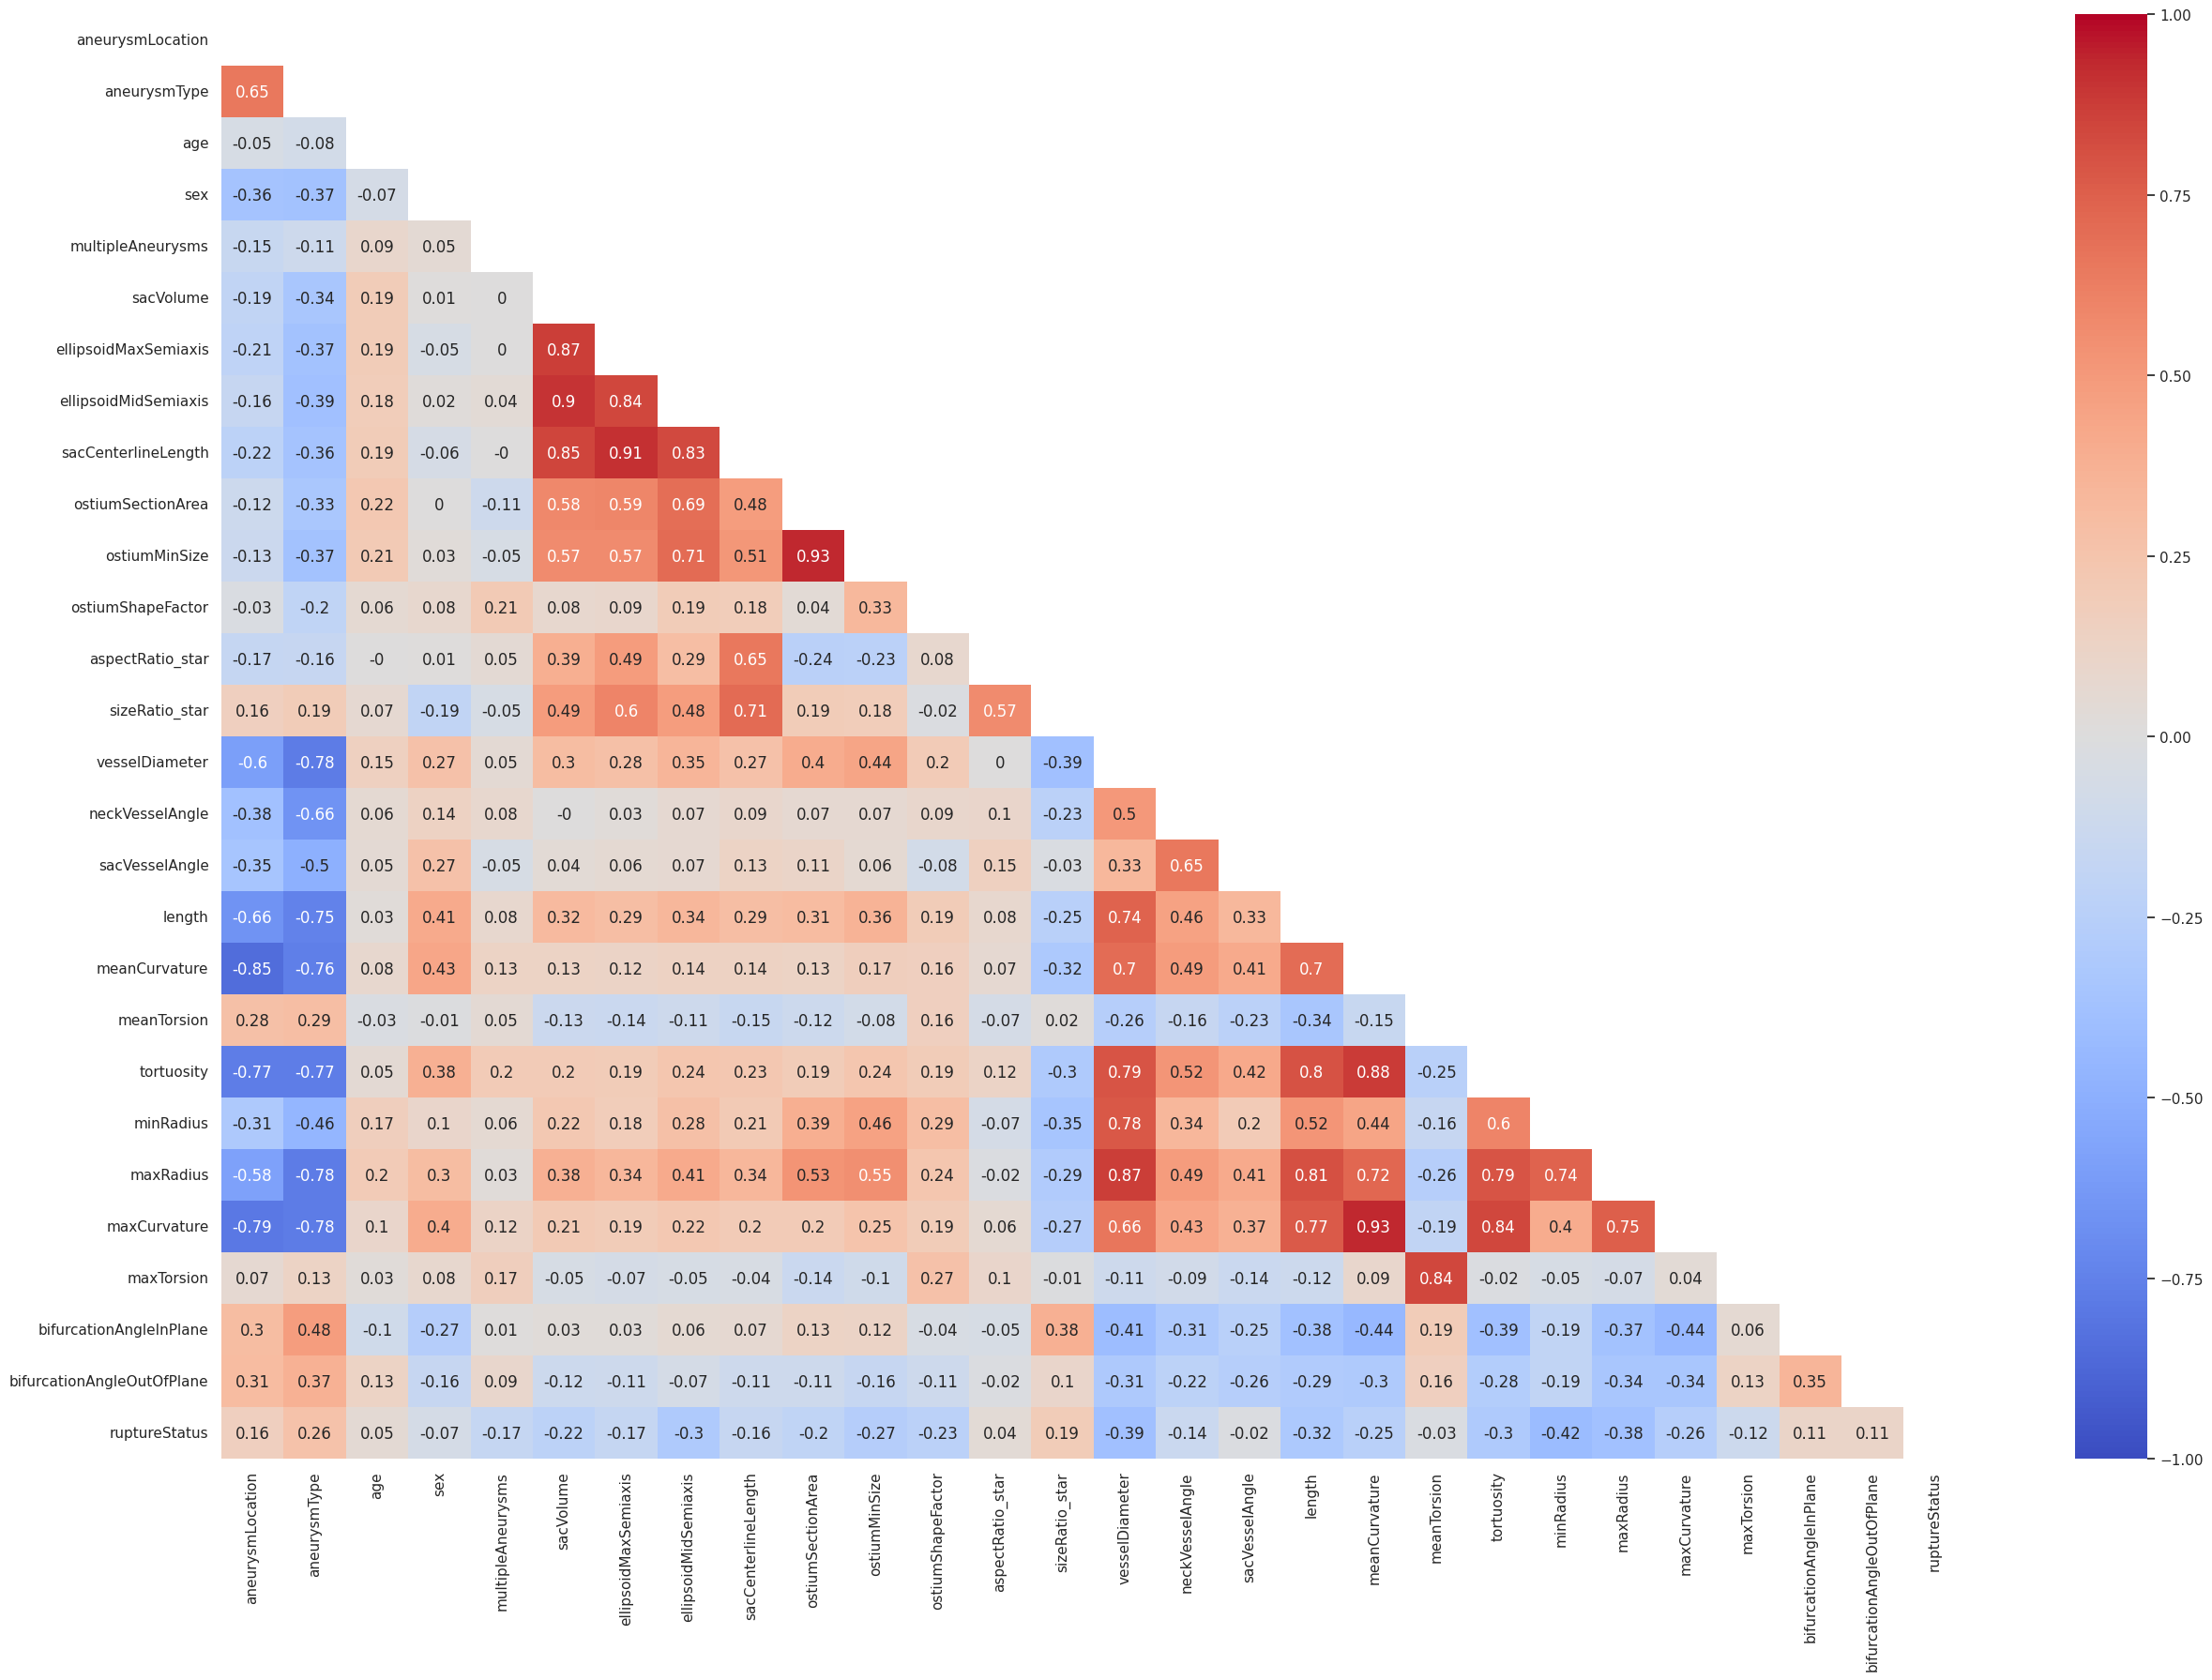

In [38]:
corr_matrix = round(data.corr(numeric_only = True), 2)
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30,20))
    sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True, mask=mask)

# **6. Анализ несбалансированности классов**

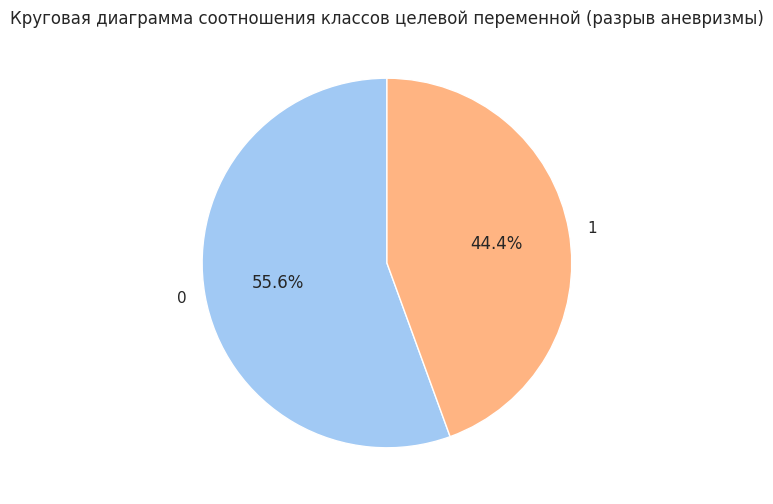

In [39]:
rupture_counts = data['ruptureStatus'].value_counts()
plt.figure(figsize=(6, 6))
sns.set_palette("pastel")
plt.pie(rupture_counts, labels=rupture_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Круговая диаграмма соотношения классов целевой переменной (разрыв аневризмы)')
plt.show()

Исходя из анализа полученной круговой диаграммы, можно сделать вывод о том, что датасет в целом сбалансирован.

# **7. Проведение нормализации данных**

## Обоснование необходимости

Необходимость проведения нормализации обусловлена различным масштабом исходных данных. Кроме того, многие алгоритмы машинного обучения чувствительны к масштабированию данных (например, метод ближайших соседей, машина опорных веторов).

In [40]:
data_crop = data.drop('ruptureStatus', axis = 1)
data_class = data['ruptureStatus']

In [41]:
data_crop = (data_crop - data_crop.mean(axis = 0))/data_crop.std(axis = 0)
data_crop

,aneurysmLocation,aneurysmType,age,sex,multipleAneurysms,sacVolume,ellipsoidMaxSemiaxis,ellipsoidMidSemiaxis,sacCenterlineLength,ostiumSectionArea,...,length,meanCurvature,meanTorsion,tortuosity,minRadius,maxRadius,maxCurvature,maxTorsion,bifurcationAngleInPlane,bifurcationAngleOutOfPlane
0,-0.931860,-1.234067,-0.100448,0.768600,-0.386828,-0.311188,-0.063951,-0.202523,-0.040146,-0.248492,...,1.678994,0.899603,-0.462961,0.602773,-0.659951,0.343189,1.643911,-0.691983,-1.723868,-1.544614
1,-0.931860,-1.234067,-1.426363,0.768600,-0.386828,-0.333264,0.531752,-0.431146,0.493095,-0.216912,...,1.154094,1.296005,-0.452263,1.642823,0.936993,1.150925,1.762085,-0.677987,-0.294814,-0.402054
2,-0.931860,0.802144,-0.837068,0.768600,-0.386828,-0.708151,-1.439372,-1.133955,-1.275913,-0.889665,...,0.295802,0.981206,-0.399461,0.872581,0.584437,0.081990,0.356881,-0.690823,-0.052263,-1.062226
3,-0.931860,0.802144,0.415186,0.768600,2.559016,-0.720020,-1.385434,-1.290569,-1.476959,-0.852440,...,0.992065,0.627574,-0.433319,0.946012,-0.194508,0.076272,0.342494,-0.677627,0.167320,0.767946
4,-0.931860,-1.234067,-2.089321,0.768600,-0.386828,-0.619268,-0.740560,-0.837238,-0.431703,-0.881444,...,1.520695,0.450179,-0.421220,0.306274,-1.526694,0.240428,0.695221,-0.654649,-0.286756,0.377644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2.109486,0.802144,-0.837068,0.768600,-0.386828,-0.483772,-0.555455,-0.095531,-0.683958,-0.082177,...,-0.220428,-1.185511,0.026712,-0.840320,0.205946,-0.348594,-0.838452,0.653177,0.623023,0.490728
95,2.109486,0.802144,0.930819,-1.287925,-0.386828,0.788016,1.086320,1.257569,0.829402,1.710474,...,-0.992649,-1.100598,3.170172,-0.896693,-0.076932,-0.608695,-0.704968,1.733222,1.627370,1.278541
96,-0.931860,-1.234067,2.183072,0.768600,-0.386828,-0.420514,-0.323562,-0.168306,0.015594,-0.402857,...,0.281887,1.398060,-0.186139,0.554187,0.812038,0.882723,1.746843,0.200398,-0.038301,-0.219274
97,1.095704,0.802144,0.341524,0.768600,-0.386828,2.854178,1.719547,2.819545,1.912106,2.113983,...,-0.610782,-1.523721,0.039114,-0.902705,0.192949,-0.598468,-1.208461,-0.268918,2.145434,-0.411515


In [42]:
data = pd.concat((data_crop, data_class), axis = 1)
data

,aneurysmLocation,aneurysmType,age,sex,multipleAneurysms,sacVolume,ellipsoidMaxSemiaxis,ellipsoidMidSemiaxis,sacCenterlineLength,ostiumSectionArea,...,meanCurvature,meanTorsion,tortuosity,minRadius,maxRadius,maxCurvature,maxTorsion,bifurcationAngleInPlane,bifurcationAngleOutOfPlane,ruptureStatus
0,-0.931860,-1.234067,-0.100448,0.768600,-0.386828,-0.311188,-0.063951,-0.202523,-0.040146,-0.248492,...,0.899603,-0.462961,0.602773,-0.659951,0.343189,1.643911,-0.691983,-1.723868,-1.544614,0
1,-0.931860,-1.234067,-1.426363,0.768600,-0.386828,-0.333264,0.531752,-0.431146,0.493095,-0.216912,...,1.296005,-0.452263,1.642823,0.936993,1.150925,1.762085,-0.677987,-0.294814,-0.402054,0
2,-0.931860,0.802144,-0.837068,0.768600,-0.386828,-0.708151,-1.439372,-1.133955,-1.275913,-0.889665,...,0.981206,-0.399461,0.872581,0.584437,0.081990,0.356881,-0.690823,-0.052263,-1.062226,0
3,-0.931860,0.802144,0.415186,0.768600,2.559016,-0.720020,-1.385434,-1.290569,-1.476959,-0.852440,...,0.627574,-0.433319,0.946012,-0.194508,0.076272,0.342494,-0.677627,0.167320,0.767946,0
4,-0.931860,-1.234067,-2.089321,0.768600,-0.386828,-0.619268,-0.740560,-0.837238,-0.431703,-0.881444,...,0.450179,-0.421220,0.306274,-1.526694,0.240428,0.695221,-0.654649,-0.286756,0.377644,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2.109486,0.802144,-0.837068,0.768600,-0.386828,-0.483772,-0.555455,-0.095531,-0.683958,-0.082177,...,-1.185511,0.026712,-0.840320,0.205946,-0.348594,-0.838452,0.653177,0.623023,0.490728,0
95,2.109486,0.802144,0.930819,-1.287925,-0.386828,0.788016,1.086320,1.257569,0.829402,1.710474,...,-1.100598,3.170172,-0.896693,-0.076932,-0.608695,-0.704968,1.733222,1.627370,1.278541,1
96,-0.931860,-1.234067,2.183072,0.768600,-0.386828,-0.420514,-0.323562,-0.168306,0.015594,-0.402857,...,1.398060,-0.186139,0.554187,0.812038,0.882723,1.746843,0.200398,-0.038301,-0.219274,1
97,1.095704,0.802144,0.341524,0.768600,-0.386828,2.854178,1.719547,2.819545,1.912106,2.113983,...,-1.523721,0.039114,-0.902705,0.192949,-0.598468,-1.208461,-0.268918,2.145434,-0.411515,1


# **8. Разбиение данных на обучающую и тестовую выборки**

Разобьем данные на обучающую и тестовую выборки в отношении 80/20 соответственно

In [43]:
X = data.drop('ruptureStatus', axis = 1)
y = data['ruptureStatus']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print("Количество объектов в train:", N_train)
print("Количество объектов в test:", N_test)

Количество объектов в train: 79
Количество объектов в test: 20


# **9. Применение KNN и подбор оптимального количества ближайших соседей**

## Обоснование выбора метода

Следуя авторитетному мнению лектора, применим KNN, т.к. "этот метод устойчив к выбросам и достаточно точен, поэтому его можно использовать как хороший *baseline*".

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import accuracy_score, log_loss

In [46]:
recall_train = []
recall_test = []
neighbors = []
max_recall = -1
for i in range(1, 80, 1): # от 1 до размера X_train (иначе ошибка n_neighbors <= n_samples_fit)
    model = KNeighborsClassifier(algorithm='auto', n_neighbors=i, n_jobs=-1)
    model.fit(X_train, y_train)

    neighbors.append(i)

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    cur_recall = recall_score(y_test, pred_test)
    recall_train.append(recall_score(y_train, pred_train))
    recall_test.append(cur_recall)

    err_train = np.mean(y_train != pred_train)
    err_test  = np.mean(y_test  != pred_test)

    if cur_recall > max_recall:
      max_recall = cur_recall
      max_err_train = err_train
      max_err_test = err_test
      amount_k = i
      max_model = model

print("Оптимальное количество ближайших соседей: ", amount_k)
print("Recall, соответствующий оптимальному количеству ближайших соседей: ", round(max_recall, 2))
print("Ошибка на train и test соответственно для K = " + str(amount_k) +": ", round(max_err_train, 2), round(max_err_test, 2))
print("\nClassification report:")
report = classification_report(y_test, max_model.predict(X_test))
print(report)

Оптимальное количество ближайших соседей:  7
Recall, соответствующий оптимальному количеству ближайших соседей:  0.56
Ошибка на train и test соответственно для K = 7:  0.34 0.4

Classification report:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.56      0.56      0.56         9

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



**Recall** - доля объектов положительного класса, которые обнаружил алгоритм машинного обучения, из всех объектов положительного класса

## Построение графика зависимости точности от количества соседей

Количество перебранных значений параметра K:

In [47]:
len(recall_train)

79

Text(0, 0.5, 'Recall')

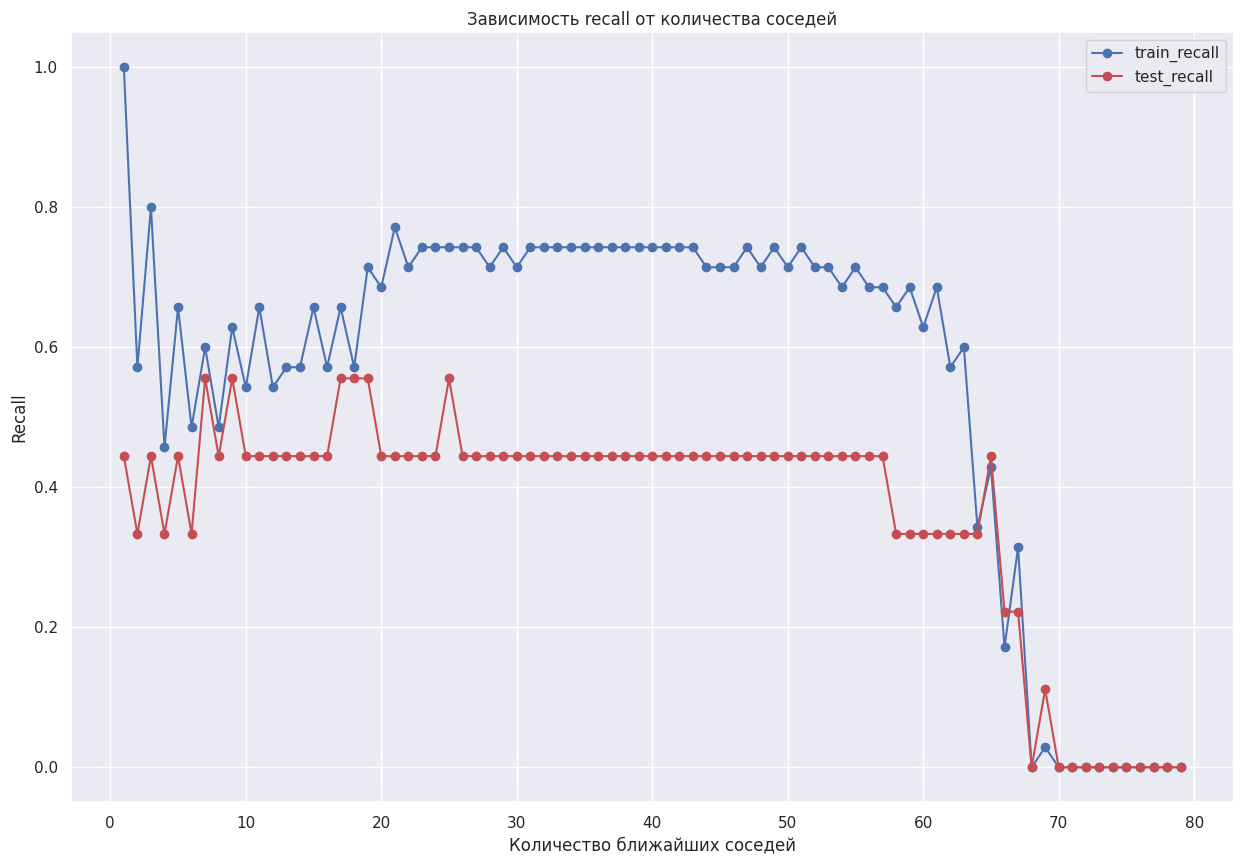

In [48]:
plt.figure(figsize=(15,10))

plt.plot(neighbors, recall_train, 'bo-', neighbors, recall_test, 'ro-')
plt.legend(['train_recall', 'test_recall'])
plt.title('Зависимость recall от количества соседей')
plt.xlabel('Количество ближайших соседей')
plt.ylabel('Recall')

## Выводы по KNN

При K = 7 recall на тестовой выборке достигает максимального значения и равняется 56%. Ошибка на тренировочной выборке при этом же значении параметра K достигает 40%. Такая небольшая точность классификации является следствием малого объема датасета.

# **10. Применение других классификаторов**

## Машина опорных векторов

In [49]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', gamma='auto', random_state=123)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print("Recall на тестовой выборке: ", round(recall_score(y_test, svc.predict(X_test)), 2))
print("Ошибка на train и test соответственно: ", round(err_train, 2), round(err_test, 2))

Recall на тестовой выборке:  0.44
Ошибка на train и test соответственно:  0.19 0.5


In [50]:
from sklearn.model_selection import GridSearchCV
params = [
    {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
      'C' : np.logspace(0, 1, 20),
      'gamma' : np.logspace(0, 1, 20)
    }
]
svc = SVC(random_state=123)
clf = GridSearchCV(estimator = svc, param_grid = params, scoring = 'recall', cv = 5, verbose=True, n_jobs=-1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

err_train = np.mean(y_train != clf.predict(X_train))
err_test  = np.mean(y_test  != pred)

print("\nBest estimator:")
print(clf.best_estimator_)

recallabc = recall_score(y_test, pred)
print(f'\nRecall SVC: {recallabc:.2f}')

print('\nClassification report for SVC:')
reportabc = classification_report(y_test, pred)
print(reportabc)

print("Ошибка на train и test соответственно: ", round(err_train, 2), round(err_test, 2))

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits

Best estimator:
SVC(C=10.0, gamma=6.158482110660264, kernel='sigmoid', random_state=123)

Recall SVC: 0.89

Classification report for SVC:
              precision    recall  f1-score   support

           0       0.86      0.55      0.67        11
           1       0.62      0.89      0.73         9

    accuracy                           0.70        20
   macro avg       0.74      0.72      0.70        20
weighted avg       0.75      0.70      0.69        20

Ошибка на train и test соответственно:  0.41 0.3


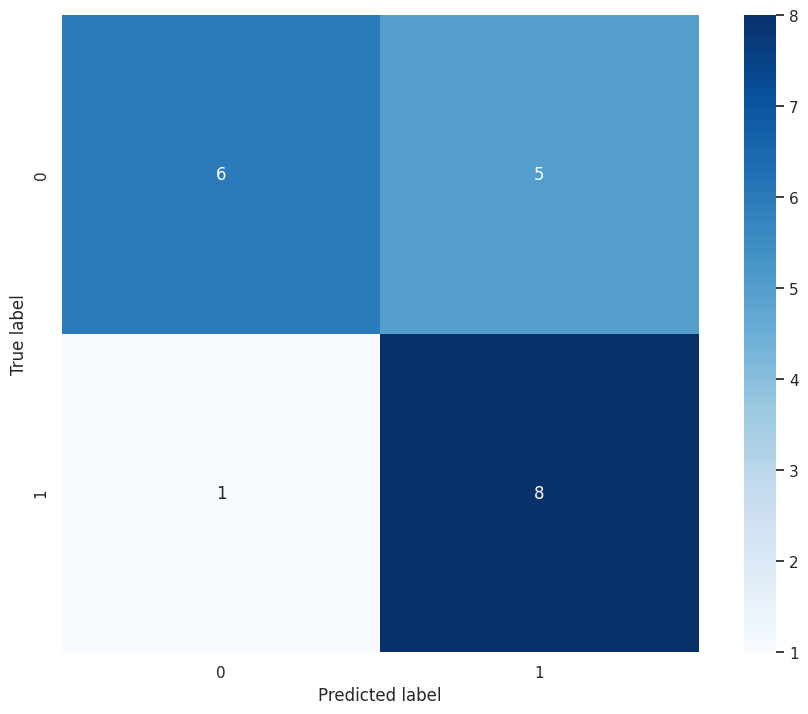

In [51]:
sns.heatmap(confusion_matrix(y_test, clf.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

В результате поиска оптимальных параметров для модели SVC удалось увеличить **Recall** почти в два раза.

## Градиентный бустинг

In [52]:
import xgboost
xgb = xgboost.XGBClassifier(enable_categorical = True, random_state=123)
xgb.fit(X_train, y_train)

err_train = np.mean(y_train != xgb.predict(X_train))
err_test  = np.mean(y_test  != xgb.predict(X_test))

print("Recall на тестовой выборке: ", round(recall_score(y_test, xgb.predict(X_test)), 2))
print("Ошибка на train и test соответственно: ", round(err_train, 2), round(err_test, 2))

Recall на тестовой выборке:  0.44
Ошибка на train и test соответственно:  0.0 0.45


In [53]:
params = [{
          'learning_rate': [0.001, 0.01, 0.1, 0.20, 0.25, 0.30],
          'gamma': np.round(np.linspace(0, 1, 10, True), 1),
          'max_depth': list(range(3, 11))
        }
]
xgb = xgboost.XGBClassifier(enable_categorical = True, random_state=123)
clfxgb = GridSearchCV(estimator = xgb, param_grid = params, scoring = 'recall', cv = 5, verbose=True, n_jobs=-1)
clfxgb.fit(X_train, y_train)
pred = clfxgb.predict(X_test)

err_train = np.mean(y_train != clfxgb.predict(X_train))
err_test  = np.mean(y_test  != pred)

print("\nBest estimator:")
print(clfxgb.best_estimator_)

recallabc = recall_score(y_test, pred)
print(f'\nRecall XGBClassifier: {recallabc:.2f}')

print('\nClassification report for XGBClassifier:')
reportabc = classification_report(y_test, pred)
print(reportabc)

print("Ошибка на train и test соответственно: ", round(err_train, 2), round(err_test, 2))

Fitting 5 folds for each of 480 candidates, totalling 2400 fits

Best estimator:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

Recall XGBClassifier: 0.56

Classification report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.67      0.73      0.7

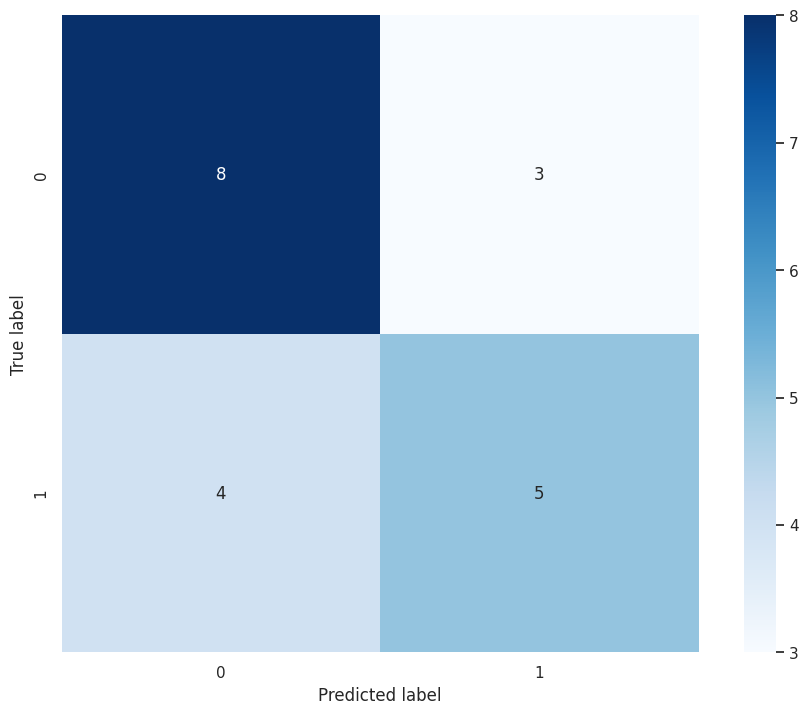

In [54]:
sns.heatmap(confusion_matrix(y_test, clfxgb.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

Удалось повысить **Recall** до 56%. Однако при изменении сетки параметров процесс оптимизации начинает выполняться неприемлемо долго. Требуется дальнейшая минимизация ошибки II-го рода.

## Метод случайного леса

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=123)
rfc.fit(X_train, y_train)

err_train = np.mean(y_train != rfc.predict(X_train))
err_test  = np.mean(y_test  != rfc.predict(X_test))

print("Recall на тестовой выборке: ", round(recall_score(y_test, rfc.predict(X_test)), 2))

print('\nClassification_report:')
report = classification_report(y_test, rfc.predict(X_test))
print(report)

print("\nОшибка на train и test соответственно: ", round(err_train, 2), round(err_test, 2))

Recall на тестовой выборке:  0.44

Classification_report:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20


Ошибка на train и test соответственно:  0.0 0.4


### Визуализация feature importances

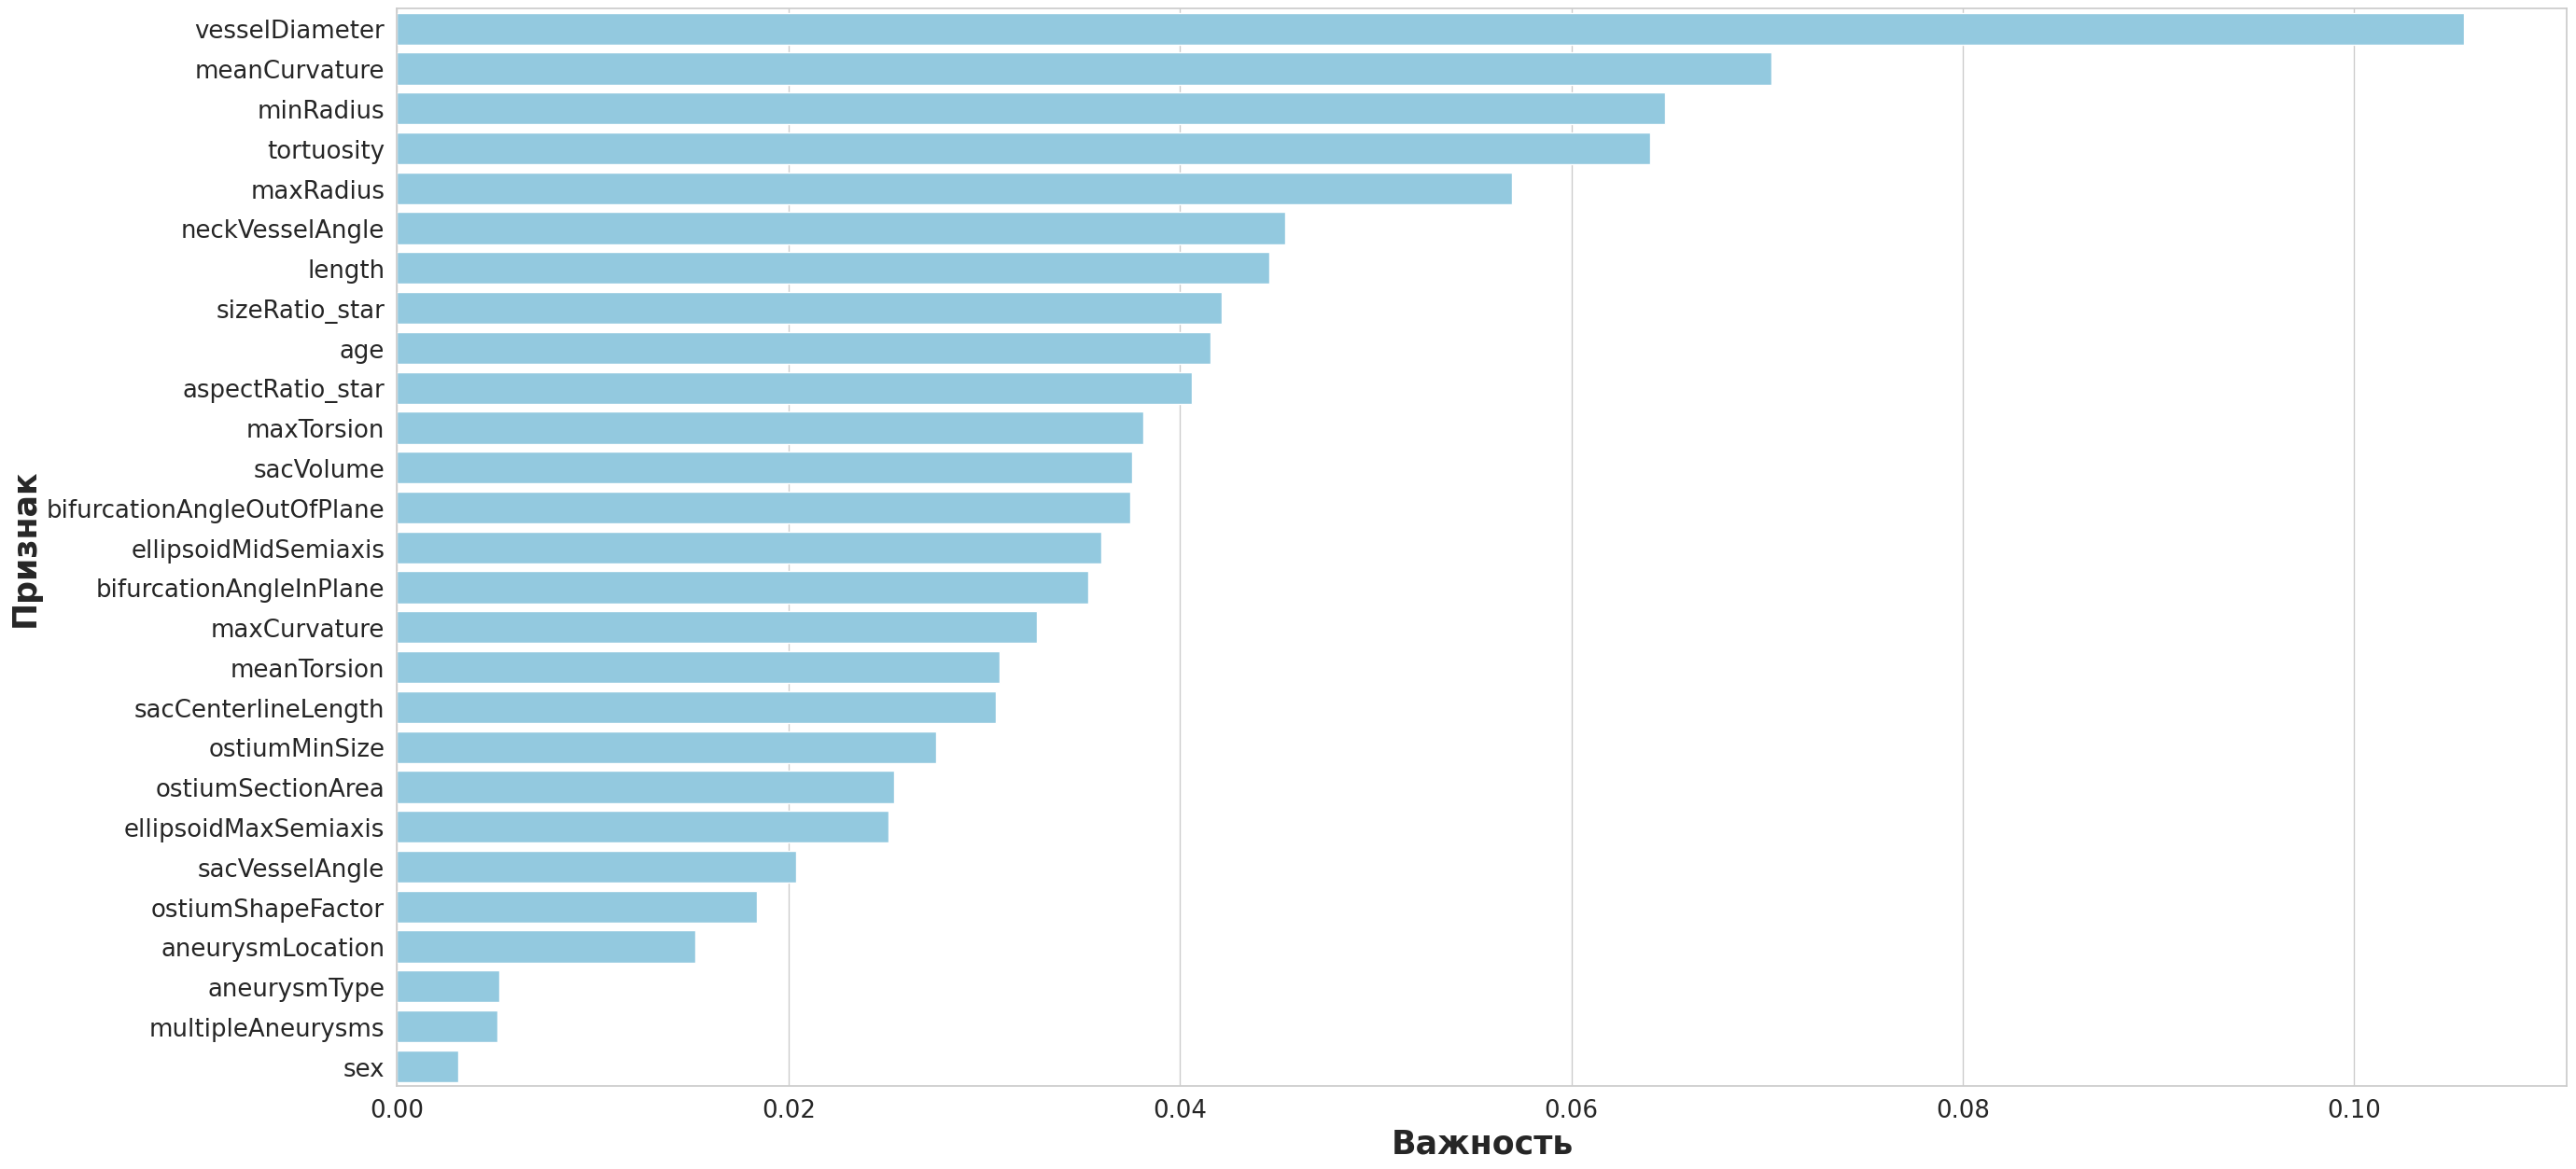

None

,Признак,Важность
0,vesselDiameter,0.105590
1,meanCurvature,0.070217
2,minRadius,0.064781
3,tortuosity,0.064037
4,maxRadius,0.056990
5,neckVesselAngle,0.045403
6,length,0.044583
7,sizeRatio_star,0.042160
8,age,0.041541
9,aspectRatio_star,0.040625


In [56]:
feats = {}
for feature, importance in zip(data.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Важность'})
importances = importances.sort_values(by='Важность', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Признак'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Важность'], y=importances['Признак'], data=importances, color='skyblue')
plt.xlabel('Важность', fontsize=25, weight = 'bold')
plt.ylabel('Признак', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

Максимальная важность признака не привышает 11%. На основании этого можно выдвинуть гипотезу о том, что датасет может не содержать релевантных признаков, отражающих происходящие в реальности процессы или зависимости.

### Поиск оптимальных параметров для случайного леса

In [57]:
from sklearn.ensemble import RandomForestClassifier
params = [{
        'n_estimators': [100, 200, 300, 400],
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_features': ['sqrt', 'log2'],
        'min_samples_leaf': [ 1, 2, 4]
        }]
frc = RandomForestClassifier(random_state=123)
clffrc = GridSearchCV(estimator = frc, param_grid = params, scoring = 'recall', cv = 5, verbose=True, n_jobs=-1)
clffrc.fit(X_train, y_train)
pred = clffrc.predict(X_test)

err_train = np.mean(y_train != clffrc.predict(X_train))
err_test  = np.mean(y_test  != pred)

print("\nBest estimator:")
print(clffrc.best_estimator_)

recallabc = recall_score(y_test, pred)
print(f'\nRecall RandomForestClassifier: {recallabc:.2f}')

print('\nClassification report for RandomForestClassifier:')
reportabc = classification_report(y_test, pred)
print(reportabc)

print("Ошибка на train и test соответственно: ", round(err_train, 2), round(err_test, 2))

Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best estimator:
RandomForestClassifier(criterion='entropy', n_estimators=400, random_state=123)

Recall RandomForestClassifier: 0.44

Classification report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20

Ошибка на train и test соответственно:  0.0 0.4


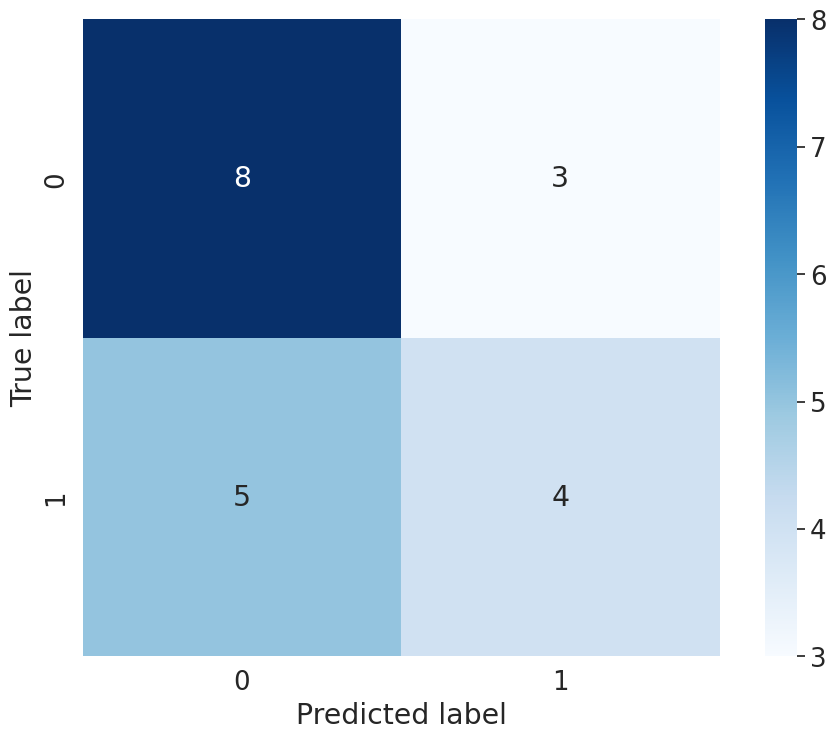

In [58]:
sns.heatmap(confusion_matrix(y_test, clffrc.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

Увеличить **Recall** путем подобра параметров модели не удалось.

##AdaBoostClassifier

In [59]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=10, learning_rate=1, random_state=123)
abc.fit(X_train, y_train)
pred = abc.predict(X_test)

err_train = np.mean(y_train != abc.predict(X_train))
err_test  = np.mean(y_test  != pred)

recallabc = recall_score(y_test, pred)
print(f'Recall AdaBoostClassifier: {recallabc:.2f}')

print('\nClassification report for AdaBoostClassifier:')
reportabc = classification_report(y_test, pred)
print(reportabc)

print("Ошибка на train и test соответственно: ", round(err_train, 2), round(err_test, 2))

Recall AdaBoostClassifier: 0.67

Classification report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.57      0.36      0.44        11
           1       0.46      0.67      0.55         9

    accuracy                           0.50        20
   macro avg       0.52      0.52      0.49        20
weighted avg       0.52      0.50      0.49        20

Ошибка на train и test соответственно:  0.11 0.5


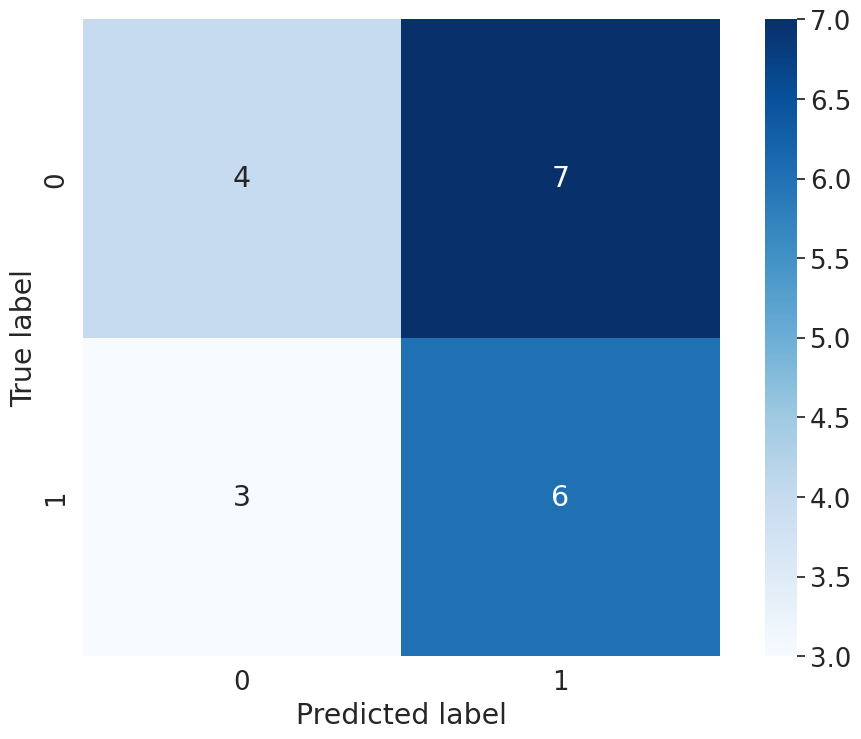

In [60]:
sns.heatmap(confusion_matrix(y_test, abc.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

In [61]:
from sklearn.ensemble import AdaBoostClassifier
params = [{
            'n_estimators': list(range(1, 10, 1)),
            'learning_rate': np.logspace(0, 1, 30),
        }]
abc = AdaBoostClassifier(random_state=123)
clfabc = GridSearchCV(estimator = abc, param_grid = params, scoring = 'recall', cv = 5, verbose=True, n_jobs=-1)
clfabc.fit(X_train, y_train)
pred = clfabc.predict(X_test)

err_train = np.mean(y_train != clfabc.predict(X_train))
err_test  = np.mean(y_test  != pred)

print("\nBest estimator:")
print(clfabc.best_estimator_)

recallabc = recall_score(y_test, pred)
print(f'\nRecall AdaBoostClassifier: {recallabc:.2f}')

print('\nClassification report for AdaBoostClassifier:')
reportabc = classification_report(y_test, pred)
print(reportabc)

print("Ошибка на train и test соответственно: ", round(err_train, 2), round(err_test, 2))

Fitting 5 folds for each of 270 candidates, totalling 1350 fits

Best estimator:
AdaBoostClassifier(learning_rate=2.807216203941177, n_estimators=5,
                   random_state=123)

Recall AdaBoostClassifier: 0.67

Classification report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       0.60      0.67      0.63         9

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20

Ошибка на train и test соответственно:  0.34 0.35


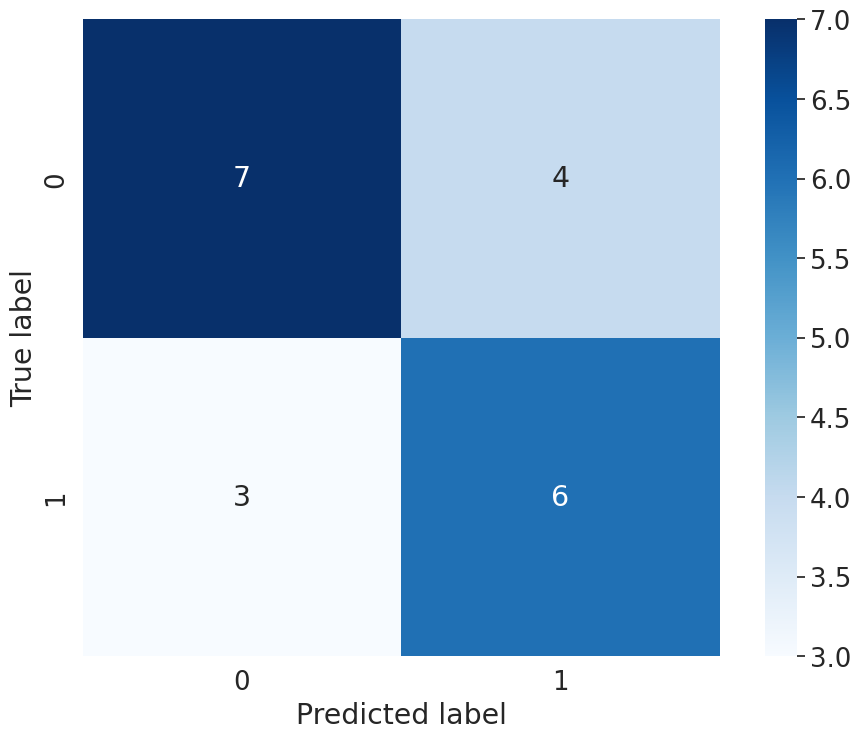

In [62]:
sns.heatmap(confusion_matrix(y_test, clfabc.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

В результате подбора параметров модели **Recall** не изменился (в самом деле, сравните матрицы ошибок). Однако удалось сократить ошибку I-го рода (на это косвенно указывает снижение ошибки на тесте). Таким образом, при оптимизации одной метрики не нужно забывать смотреть и на другие, но они должны отражать смысл решаемой задачи.

## **Попытка применения PCA с SVC, AdaBoostClassifier и XGBClassifier**

### SVC

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8, random_state=123)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

params = [
    {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
      'C' : np.logspace(0, 1, 20),
      'gamma' : np.logspace(0, 1, 20)
    }
]
svm1 = SVC(random_state=123)
clfsvm1 = GridSearchCV(estimator = svm1, param_grid = params, scoring = 'recall', cv = 5, verbose=True, n_jobs=-1)
clfsvm1.fit(X_train_pca, y_train)
pred = clfsvm1.predict(X_test_pca)

err_train = np.mean(y_train != clfsvm1.predict(X_train_pca))
err_test  = np.mean(y_test  != pred)

recall = recall_score(y_test, pred)
print(f'Recall (с SVC был применен PCA): {recall:.2f}')

print('\nClassification report for SVC with PCA:')
report = classification_report(y_test, pred)
print(report)

print("Ошибка на train и test соответственно: ", round(err_train, 2), round(err_test, 2))

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Recall (с SVC был применен PCA): 0.67

Classification report for SVC with PCA:
              precision    recall  f1-score   support

           0       0.62      0.45      0.53        11
           1       0.50      0.67      0.57         9

    accuracy                           0.55        20
   macro avg       0.56      0.56      0.55        20
weighted avg       0.57      0.55      0.55        20

Ошибка на train и test соответственно:  0.28 0.45


Применение PCA в связке с SVC позволило увеличить **Recall** с 44% до 67% и уменьшить ошибку на test на 5%. Однако полученные результаты всё равно нельзя считать удовлетворительными.

###AdaBoostClassifier

In [64]:
from sklearn.ensemble import AdaBoostClassifier
pca = PCA(n_components=10, random_state=123)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

params = [{
            'n_estimators': list(range(1, 20, 1)),
            'learning_rate': np.logspace(0, 1, 30),
        }]
abc2 = AdaBoostClassifier(random_state=123)
clfabc = GridSearchCV(estimator = abc2, param_grid = params, scoring = 'recall', cv = 5, verbose=True, n_jobs=-1)
clfabc.fit(X_train_pca, y_train)
pred = clfabc.predict(X_test_pca)

err_train = np.mean(y_train != clfabc.predict(X_train_pca))
err_test  = np.mean(y_test  != pred)

print("\nBest estimator:")
print(clfabc.best_estimator_)

recallabc = recall_score(y_test, pred)
print(f'\nRecall AdaBoostClassifier with PCA: {recallabc:.2f}')

print('\nClassification report for AdaBoostClassifier with PCA:')
reportabc = classification_report(y_test, pred)
print(reportabc)

print("Ошибка на train и test соответственно: ", round(err_train, 2), round(err_test, 2))

Fitting 5 folds for each of 570 candidates, totalling 2850 fits

Best estimator:
AdaBoostClassifier(learning_rate=3.2903445623126686, n_estimators=8,
                   random_state=123)

Recall AdaBoostClassifier with PCA: 1.00

Classification report for AdaBoostClassifier with PCA:
              precision    recall  f1-score   support

           0       1.00      0.09      0.17        11
           1       0.47      1.00      0.64         9

    accuracy                           0.50        20
   macro avg       0.74      0.55      0.40        20
weighted avg       0.76      0.50      0.38        20

Ошибка на train и test соответственно:  0.39 0.5


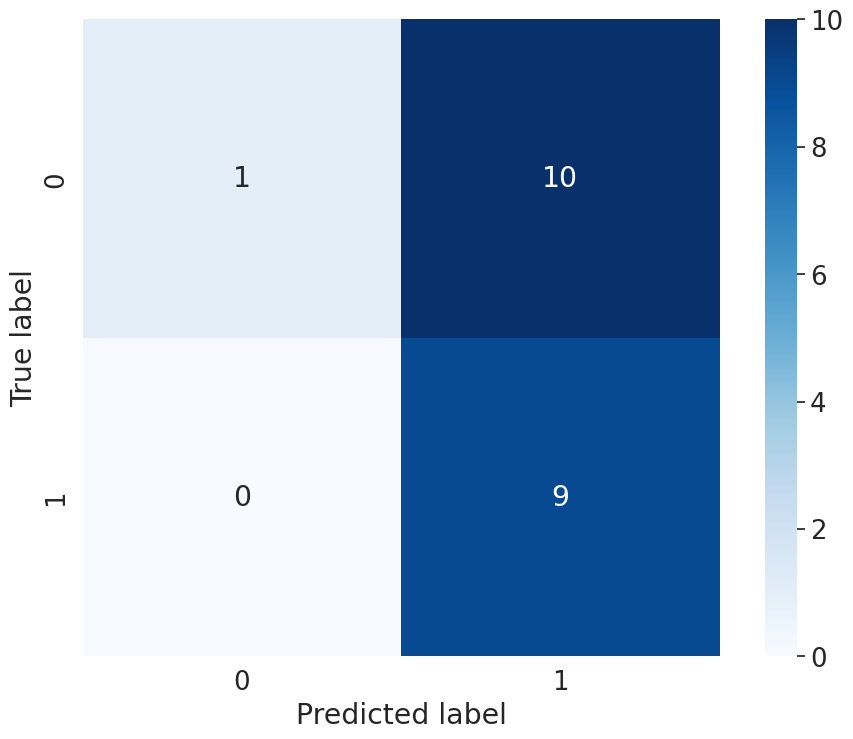

In [65]:
sns.heatmap(confusion_matrix(y_test, clfabc.predict(X_test_pca)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

Ошибка II-го рода была успешно устранена! За счет ошибки I-го рода...

###XGBClassifier

In [66]:
import xgboost
pca2 = PCA(n_components=10, random_state=123)
pca2.fit(X_train)
X_train_pca2 = pca2.transform(X_train)
X_test_pca2 = pca2.transform(X_test)

params = [{
          'learning_rate': np.logspace(-1.5, 1, 20),
          'gamma': np.round(np.linspace(0, 1, 10, True), 1),
          'max_depth': list(range(3, 11))
        }
]

xgb3 = xgboost.XGBClassifier(enable_categorical = True, random_state=123, n_jobs = -1)
clfrfc2 = GridSearchCV(estimator = xgb3, param_grid = params, scoring = 'recall', cv = 5, verbose=True, n_jobs=-1)
clfrfc2.fit(X_train_pca2, y_train)
pred = clfrfc2.predict(X_test_pca2)

err_train = np.mean(y_train != clfrfc2.predict(X_train_pca2))
err_test  = np.mean(y_test  != pred)

print("\nBest estimator:")
print(clfrfc2.best_estimator_)

recallabc = recall_score(y_test, pred)
print(f'\nRecall XGBClassifier with PCA: {recallabc:.2f}')

print('\nClassification report for XGBClassifier with PCA:')
reportabc = classification_report(y_test, pred)
print(reportabc)

print("Ошибка на train и test соответственно: ", round(err_train, 2), round(err_test, 2))

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits

Best estimator:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=7.386199822079358,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...)

Recall XGBClassifier with PCA: 0.44

Classification report for XGBClassifier with PCA:
              precision    recall  f1-score   support

           0

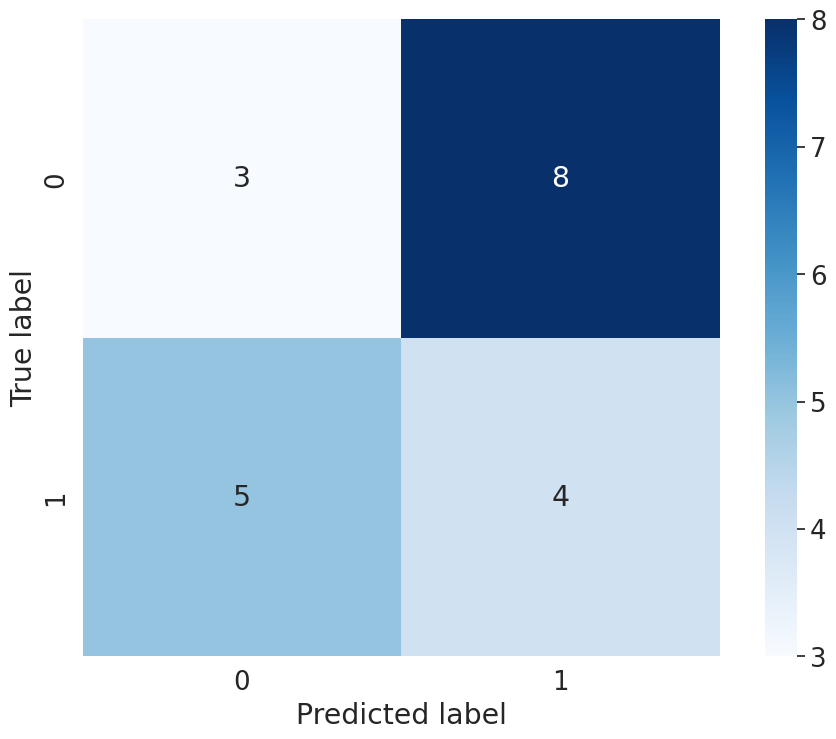

In [67]:
sns.heatmap(confusion_matrix(y_test, clfrfc2.predict(X_test_pca2)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

Применение XGBClassifier совместно с PCA уменьшило **Recall** на 12%, а также увеличило ошибки на train и test на 30%.

## Попытка применения LOOCV к RandomForestClassifier и SVM

In [68]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [69]:
cv = LeaveOneOut()
forest = RandomForestClassifier(random_state=123)
scores = cross_val_score(forest, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Значение Recall c LOOCV: ', round(np.mean(scores), 2))

Значение Recall c LOOCV:  0.23


In [70]:
svmLOOCV = SVC(random_state=123)
scores = cross_val_score(svmLOOCV, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Значение Recall c LOOCV: ', round(np.mean(scores), 2))

Значение Recall c LOOCV:  0.22


Применение LOOCV крайне негативно отразилось на **Recall**

## Попытка применения нейронной сети

### Поиск оптимального количества нейронов в скрытом слое

In [71]:
from sklearn.neural_network import MLPClassifier
neuron = list((i, ) for i in range(20, 50, 1))
neuron.append((10, 20))
params = [{
          'alpha': np.logspace(-4, 0, 20),
          'learning_rate': ['constant', 'invscaling', 'adaptive'],
          'learning_rate_init': [0.009],
          }
]
mlp = MLPClassifier(hidden_layer_sizes = (37, ), solver = 'adam', activation = 'relu', random_state = 42, max_iter = 100000)
clfmlp = GridSearchCV(estimator = mlp, param_grid = params, scoring = 'recall', cv = 5, verbose=True, n_jobs=-1)
clfmlp.fit(X_train, y_train)
pred = clfmlp.predict(X_test)

err_train = np.mean(y_train != clfmlp.predict(X_train))
err_test  = np.mean(y_test  != pred)

print("\nBest estimator:")
print(clfmlp.best_estimator_)

recallabc = recall_score(y_test, pred)
print(f'\nRecall MLP: {recallabc:.2f}')

print('\nClassification report for MLP:')
reportabc = classification_report(y_test, pred)
print(reportabc)

print("Ошибка на train и test соответственно: ", round(err_train, 2), round(err_test, 2))

Fitting 5 folds for each of 60 candidates, totalling 300 fits

Best estimator:
MLPClassifier(alpha=0.05455594781168514, hidden_layer_sizes=(37,),
              learning_rate_init=0.009, max_iter=100000, random_state=42)

Recall MLP: 0.89

Classification report for MLP:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.80      0.89      0.84         9

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20

Ошибка на train и test соответственно:  0.0 0.15


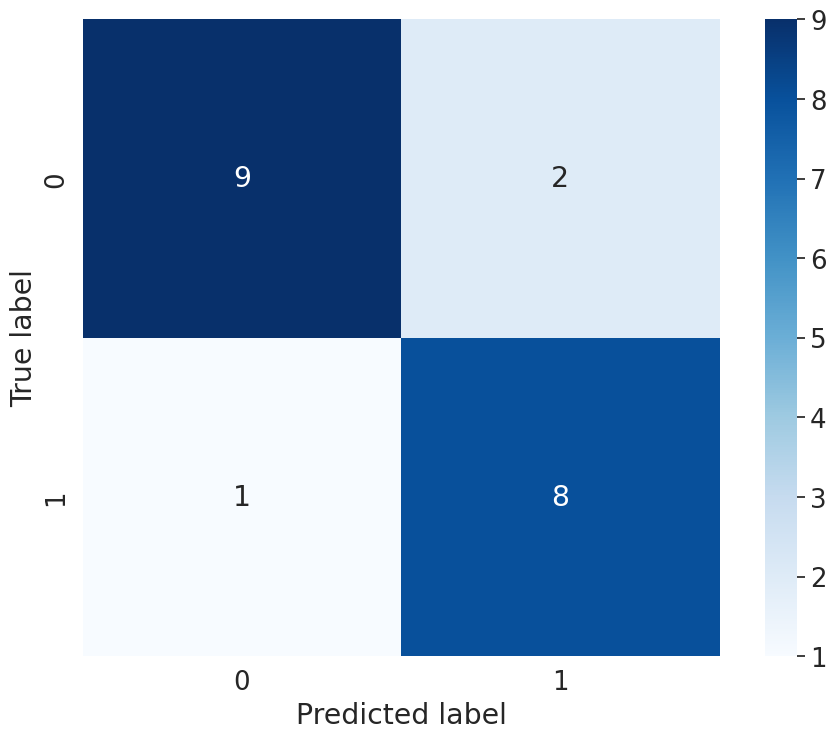

In [72]:
sns.heatmap(confusion_matrix(y_test, clfmlp.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

Удалось максимизировать **Recall** сразу для двух классов (см. матрицу ошибок).

Проведём "ручной" поиск оптимального количества нейронов в скрытом слое (для возможности построения графиков)

In [73]:
from sklearn.neural_network import MLPClassifier
hidden_layer = np.arange(1, 50, 1)
recall_test = []
recall_train = []
max = -1
for neu in hidden_layer:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neu, ), solver = 'adam', beta_1 = 0.7, activation = 'relu', learning_rate = 'adaptive', random_state = 42, max_iter = 100000)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    cur_recall = recall_score(y_test, y_test_pred)
    if cur_recall > max:
        max = cur_recall
        ind = neu
        max_model = mlp_model

    recall_train.append(recall_score(y_train, y_train_pred))
    recall_test.append(recall_score(y_test, y_test_pred))

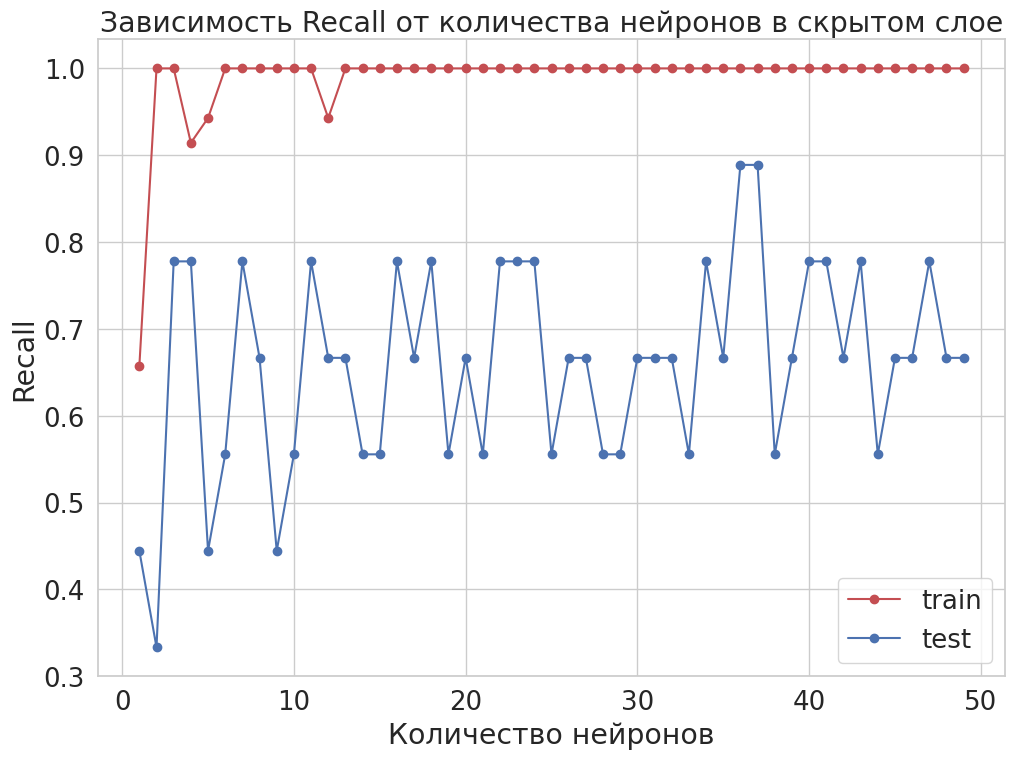

In [74]:
plt.plot(hidden_layer, recall_train, 'r-o', label = 'train')
plt.plot(hidden_layer, recall_test, 'b-o', label = 'test')
plt.title('Зависимость Recall от количества нейронов в скрытом слое')
plt.xlabel('Количество нейронов')
plt.ylabel('Recall')
plt.legend()

In [75]:
max_rec_train = np.max(recall_train)
max_rec_test = np.max(recall_test)
print("Максимальный recall на train и test соответственно:", round(max_rec_train, 2), round(max_rec_test, 2))

Максимальный recall на train и test соответственно: 1.0 0.89


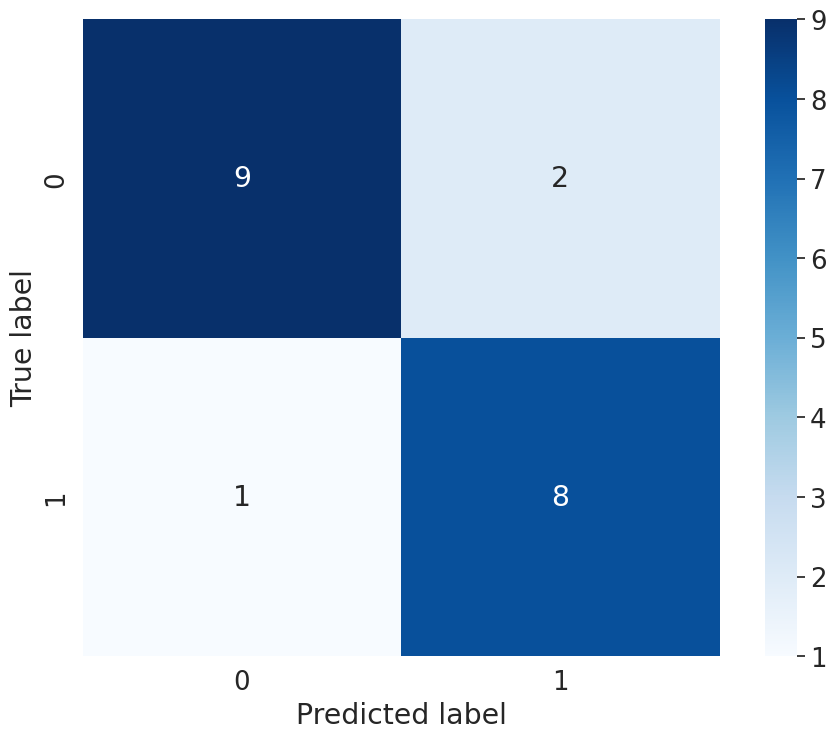

In [76]:
sns.heatmap(confusion_matrix(y_test, max_model.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

Оптимальное количество нейронов в скрытом слое

In [77]:
print(ind)

36


### Поиск оптимального значения параметра alpha

In [78]:
alpha_arr = np.logspace(-4, 0, 20)
train_rec_alp = []
test_rec_alp = []

for alpha in alpha_arr:
    mlp_model2 = MLPClassifier(alpha = alpha, hidden_layer_sizes = (36,), solver = 'adam', beta_1 = 0.7, activation = 'relu', learning_rate = 'adaptive', random_state = 42, max_iter = 100000)
    mlp_model2.fit(X_train, y_train)

    y_train_pred_alp = mlp_model.predict(X_train)
    y_test_pred_alp = mlp_model.predict(X_test)

    train_rec_alp.append(recall_score(y_train, y_train_pred_alp))
    test_rec_alp.append(recall_score(y_test, y_test_pred_alp))

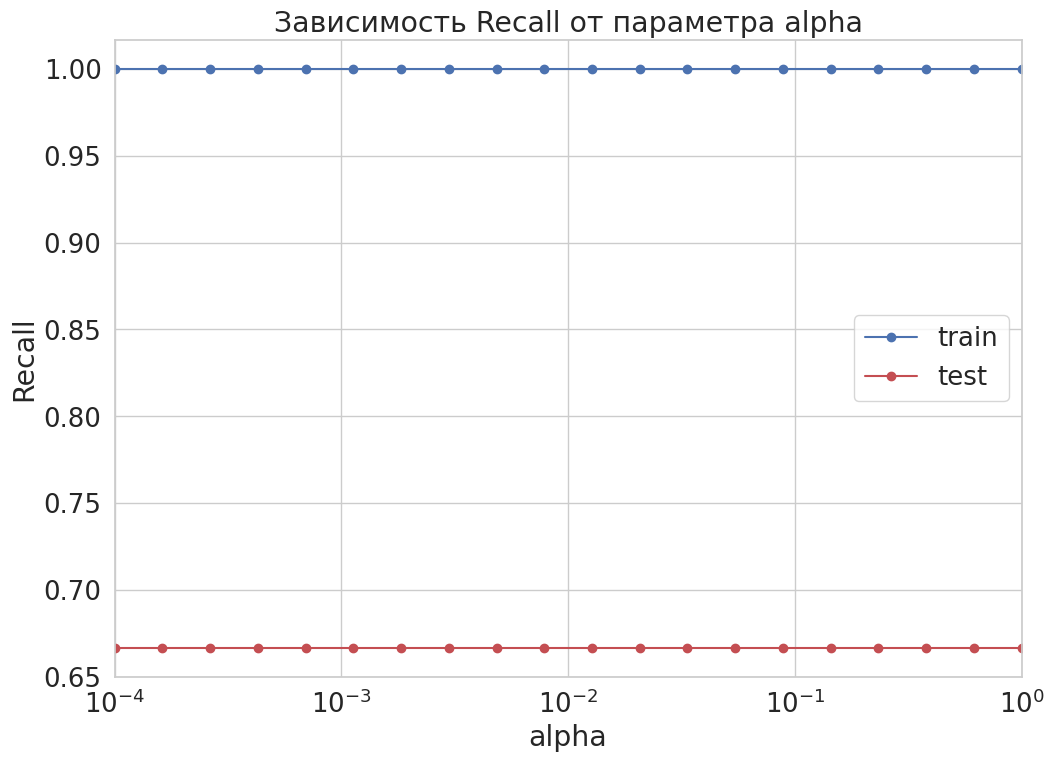

In [79]:
plt.semilogx(alpha_arr, train_rec_alp, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_rec_alp, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Зависимость Recall от параметра alpha')
plt.xlabel('alpha')
plt.ylabel('Recall')
plt.legend()

In [80]:
max_rec_train = np.max(train_rec_alp)
max_rec_test = np.max(test_rec_alp)
print("Максимальный Recall на train и test соответственно:", round(max_rec_train, 2), round(max_rec_test, 2))

Максимальный Recall на train и test соответственно: 1.0 0.67


Анализируя полученный график, мы видим, что в результате подбора параметра *alpha* максимальный **Recall** уменьшился. Из этого следует, что осуществление подбора данного параметра в "ручном режиме" нецелесообразно.

# **11. Вывод**

Таким образом, в результате выполнения данной практической работы была решена задачи классификации разрывов аневризм по их морфологическим и гемодинамическим характеристикам. Ошибку второго рода удалось полностью устранить одновременным использованием **метода PCA и модели AdaBoostClassifier**. При этом наименьшие ошибки на train и test были получены с использованием **MLPClassifier**. Кроме того, **MLPClassifier** позволил одновременно максимизировать **Recall** сразу для двух классов. Следует подчеркнуть, что малый объем датасета являлся основной преградой к построения надежного классификатора (**см. примечание**).

**Примечание:** рабочая группа научного проекта, в котором я участвую, датасет с данными о внутричерепных кровоизлияниях мне так и не предоставила. Поэтому в Интернете был найден единственный датасет, схожий с темой наших научных изысканий и удовлетворяющий условиям, сформулированным научной группой:
1.  задача классификации обязательно должна быть связана с медициной;
2.  необходимо, чтобы данные в датасете обязательно описывали какую-либо патологию головного мозга, связанную с черепно-мозгововыми травмами или с нарушением кровообращения головного мозга.